# Install requirements and prepare environment

In [1]:
!pip install gdown

In [2]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from time import time
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import gc
import random
import pickle
import gdown
import json
import string
from zipfile import ZipFile
from torch.nn.functional import cosine_similarity
from tabulate import tabulate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
url = "https://drive.google.com/file/d/1-4nIaIx2i0_WWks7neqRhoYaq43VdDGP/view?usp=sharing"
output = "pretrained_embeddings.zip"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1-4nIaIx2i0_WWks7neqRhoYaq43VdDGP
From (redirected): https://drive.google.com/uc?id=1-4nIaIx2i0_WWks7neqRhoYaq43VdDGP&confirm=t&uuid=de58dfbc-6dcf-4fcd-8dd2-c076b05bda49
To: /kaggle/working/pretrained_embeddings.zip
100%|██████████| 602M/602M [00:32<00:00, 18.3MB/s] 


'pretrained_embeddings.zip'

In [4]:
url = "https://drive.google.com/file/d/1-3KQTJYaAJRc5nluH20FLhaXY2a1m0Q-/view?usp=sharing"
output = "pretrained_embeddings_common_voice.pkl"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1-3KQTJYaAJRc5nluH20FLhaXY2a1m0Q-
From (redirected): https://drive.google.com/uc?id=1-3KQTJYaAJRc5nluH20FLhaXY2a1m0Q-&confirm=t&uuid=551e51b7-1c8a-4e2c-83ef-be9b652e79ed
To: /kaggle/working/pretrained_embeddings_common_voice.pkl
100%|██████████| 624M/624M [00:45<00:00, 13.8MB/s] 


'pretrained_embeddings_common_voice.pkl'

In [5]:
url = "https://drive.google.com/file/d/1lMXC-H60waEU9z9XlfOZeui9EmvMKvZR/view?usp=sharing"
output = "metadata.json"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1lMXC-H60waEU9z9XlfOZeui9EmvMKvZR
To: /kaggle/working/metadata.json
100%|██████████| 10.9M/10.9M [00:01<00:00, 10.8MB/s]


'metadata.json'

In [6]:
url = "https://drive.google.com/file/d/15cZ84V52tKQrtr4dVnGqf1p0tHxxK3jR/view?usp=sharing"
output = "fleurs_data.pkl"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=15cZ84V52tKQrtr4dVnGqf1p0tHxxK3jR
To: /kaggle/working/fleurs_data.pkl
100%|██████████| 41.2M/41.2M [00:04<00:00, 9.35MB/s]


'fleurs_data.pkl'

In [7]:
with ZipFile('pretrained_embeddings.zip', 'r') as zipObj:
    zipObj.extractall('pretrained_embeddings')

In [26]:
with open('metadata.json', 'r') as f:
    metadata_brown = json.load(f)

In [27]:
# open files in pretrained_embeddings
# 0 audio - 1 image - 2 text
brown_data = {}
for i in range(1, 11):
    with open(f'pretrained_embeddings/pretrained_embeddings_part{i}.pkl', 'rb') as f:
        brown_data.update(pickle.load(f))

In [28]:
len(brown_data)

54785

In [79]:
random_key = random.choice(list(metadata_brown.keys()))
print(random_key)
print(metadata_brown[random_key])

17872
{'id': 17872, 'file_path': 'dataset/part4/audios/audio_17872.wav', 'text': 'The death of her mother in 1865 prevented this.', 'part_id': 4}


In [84]:
random_key = random.choice(list(brown_data.keys()))
print(random_key)
print(metadata_brown[str(random_key)])

8752
{'id': 8752, 'file_path': 'dataset/part2/audios/audio_8752.wav', 'text': 'The only other regions so blessed are the British Isles , western Europe , eastern China , southern Chile and parts of Japan , New Zealand and Tasmania.', 'part_id': 2}


In [29]:
with open(f'pretrained_embeddings_common_voice.pkl', 'rb') as f:
    common_voice_data = pickle.load(f)

In [ ]:
random_key = random.choice(list(common_voice_data['train'].keys()))
print(random_key)
common_voice_data['train'][random_key]

In [30]:
print(len(common_voice_data['train']))
print(len(common_voice_data['validation']))
print(len(common_voice_data['test']))

50000
3492
2197


In [31]:
with open(f'fleurs_data.pkl', 'rb') as f:
    fleurs_data = pickle.load(f)

In [ ]:
random_key = random.choice(list(fleurs_data['train'].keys()))
print(random_key)
fleurs_data['train'][random_key]

In [34]:
print(len(fleurs_data['train']) + len(common_voice_data['train']))
print(len(fleurs_data['validation']) + len(common_voice_data['validation']))
print(len(fleurs_data['test']) + len(common_voice_data['test']))
print(len(fleurs_data['train']) + len(common_voice_data['train']) + len(fleurs_data['validation']) + len(common_voice_data['validation']) + len(fleurs_data['test']) + len(common_voice_data['test']))

52602
3886
2844
59332


In [35]:
a = len(fleurs_data['train']) + len(common_voice_data['train']) + len(fleurs_data['validation']) + len(common_voice_data['validation']) + len(fleurs_data['test']) + len(common_voice_data['test'])
total = a + len(brown_data)
print(total)
test_len = int(total * 0.1)
train_len = int(total * 0.8) + 1
print(train_len)
print(total - train_len - test_len)
val_len = total - train_len - test_len
print(test_len)

114117
91294
11412
11411


In [36]:
train_num_brown = train_len - (len(fleurs_data['train']) + len(common_voice_data['train']))
val_num_brown = val_len - (len(fleurs_data['validation']) + len(common_voice_data['validation']))
test_num_brown = test_len - (len(fleurs_data['test']) + len(common_voice_data['test']))
print(train_num_brown, val_num_brown, test_num_brown)

38692 7526 8567


In [37]:
# now select randomly with determined seed this numbers from brown dataset
random.seed(42)

all_brown = list(set(brown_data.keys()))
train_brown = random.sample(all_brown, train_num_brown)
remaining_brown = list(set(all_brown) - set(train_brown))
val_brown = random.sample(list(set(remaining_brown) - set(train_brown)), val_num_brown)
test_brown = random.sample(list(set(all_brown) - set(train_brown) - set(val_brown)), test_num_brown)

print(len(train_brown), len(val_brown), len(test_brown))



38692 7526 8567


In [66]:
type(brown_data[train_brown[0]])

list

In [67]:
total_train = {}
total_train['audio'] = []
total_train['pure-text'] = []
for i in train_brown:
    x = brown_data[i][0]
    if x.device != 'cpu':
        x = x.cpu()
    total_train['audio'].append(x)
    total_train['pure-text'].append(metadata_brown[str(i)]['text'])
for value in common_voice_data['train'].values():
    total_train['audio'].append(value['audio_embedding'])
    total_train['pure-text'].append(value['text'])
for value in fleurs_data['train'].values():
    total_train['audio'].append(value['audio_embedding'])
    total_train['pure-text'].append(value['text'])

total_train['text'] = []
for i in train_brown:
    total_train['text'].append(torch.Tensor(brown_data[i][2]))
for value in common_voice_data['train'].values():
    total_train['text'].append(value['text_embedding'])
for value in fleurs_data['train'].values():
    total_train['text'].append(value['text_embedding'])

total_train['image'] = []
for i in train_brown:
    total_train['image'].append(brown_data[i][1])
for value in common_voice_data['train'].values():
    total_train['image'].append(value['image_embedding'])
for value in fleurs_data['train'].values():
    total_train['image'].append(value['image_embedding'])

# shuffle them together
indices = list(range(len(total_train['audio'])))
random.shuffle(indices)
total_train['audio'] = [total_train['audio'][i] for i in indices]
total_train['text'] = [total_train['text'][i] for i in indices]
total_train['image'] = [total_train['image'][i] for i in indices]
total_train['pure-text'] = [total_train['pure-text'][i] for i in indices]

print(len(total_train['audio']), len(total_train['text']), len(total_train['image']), len(total_train['pure-text']))

91294 91294 91294 91294


In [71]:
total_val = {}
total_val['audio'] = []
total_val['pure-text'] = []

for i in val_brown:
    x = brown_data[i][0]
    if x.device != 'cpu':
        x = x.cpu()
    total_val['audio'].append(x)
    total_val['pure-text'].append(metadata_brown[str(i)]['text'])
for value in common_voice_data['validation'].values():
    total_val['audio'].append(value['audio_embedding'])
    total_val['pure-text'].append(value['text'])
for value in fleurs_data['validation'].values():
    total_val['audio'].append(value['audio_embedding'])
    total_val['pure-text'].append(value['text'])
total_val['text'] = []
for i in val_brown:
    total_val['text'].append(torch.Tensor(brown_data[i][2]))
for value in common_voice_data['validation'].values():
    total_val['text'].append(value['text_embedding'])
for value in fleurs_data['validation'].values():
    total_val['text'].append(value['text_embedding'])

total_val['image'] = []
for i in val_brown:
    total_val['image'].append(brown_data[i][1])
for value in common_voice_data['validation'].values():
    total_val['image'].append(value['image_embedding'])
for value in fleurs_data['validation'].values():
    total_val['image'].append(value['image_embedding'])
    
# shuffle them together
indices = list(range(len(total_val['audio'])))
random.shuffle(indices)
total_val['audio'] = [total_val['audio'][i] for i in indices]
total_val['text'] = [total_val['text'][i] for i in indices]
total_val['image'] = [total_val['image'][i] for i in indices]
total_val['pure-text'] = [total_val['pure-text'][i] for i in indices]


print(len(total_val['audio']), len(total_val['text']), len(total_val['image']), len(total_val['pure-text']))

11412 11412 11412 11412


In [72]:
gc.collect()

13031

In [73]:
total_test = {}
total_test['audio'] = []
total_test['pure-text'] = []
for i in test_brown:
    if type(brown_data[i][0]) == np.ndarray:
        print(type(brown_data[i][0]))
        print('audio - brown')
    x = brown_data[i][0]
    if x.device != 'cpu':
        x = x.cpu()
    total_test['audio'].append(x)
    total_test['pure-text'].append(metadata_brown[str(i)]['text'])
    # print(brown_data[i][0].device)
    # print('audio - brown')
for value in common_voice_data['test'].values():
    if type(value['audio_embedding']) == np.ndarray:
        print(type(value['audio_embedding']))
        print('audio - common_voice')
    total_test['audio'].append(value['audio_embedding'])
    total_test['pure-text'].append(value['text'])
#     print(value['audio_embedding'].device)
#     print('audio - common_voice')
for value in fleurs_data['test'].values():
    if type(value['audio_embedding']) == np.ndarray:
        print(type(value['audio_embedding']))
        print('audio - fleurs')
    total_test['audio'].append(value['audio_embedding'])
    total_test['pure-text'].append(value['text'])
#     print(value['audio_embedding'].device)
#     print('audio - fleurs')

total_test['text'] = []
for i in test_brown:
#     if type(brown_data[i][2]) == np.ndarray:
#         print(type(brown_data[i][2]))
#         print('text - brown')
    total_test['text'].append(torch.Tensor(brown_data[i][2]))
    x = torch.Tensor(brown_data[i][2])
#     print(x.device)
#     print('text - brown')
for value in common_voice_data['test'].values():
    if type(value['text_embedding']) == np.ndarray:
        print(type(value['text_embedding']))
        print('text - common_voice')
    total_test['text'].append(value['text_embedding'])
#     print(value['text_embedding'].device)
#     print('text - common_voice')
for value in fleurs_data['test'].values():
    if type(value['text_embedding']) == np.ndarray:
        print(type(value['text_embedding']))
        print('text - fleurs')
    total_test['text'].append(value['text_embedding'])
#     print(value['text_embedding'].device)
#     print('text - fleurs')

total_test['image'] = []
for i in test_brown:
    if type(brown_data[i][1]) == np.ndarray:
        print(type(brown_data[i][1]))
        print('image - brown')
    total_test['image'].append(brown_data[i][1])
#     print(brown_data[i][1].device)
#     print('image - brown')
for value in common_voice_data['test'].values():
    if type(value['image_embedding']) == np.ndarray:
        print(type(value['image_embedding']))
        print('image - common_voice')
    total_test['image'].append(value['image_embedding'])
#     print(value['image_embedding'].device)
#     print('image - common_voice')
    
for value in fleurs_data['test'].values():
    if type(value['image_embedding']) == np.ndarray:
        print(type(value['image_embedding']))
        print('image - fleurs')
    total_test['image'].append(value['image_embedding'])
#     print(value['image_embedding'].device)
#     print('image - fleurs')
    
# shuffle them together
indices = list(range(len(total_test['audio'])))
random.shuffle(indices)
total_test['audio'] = [total_test['audio'][i] for i in indices]
total_test['text'] = [total_test['text'][i] for i in indices]
total_test['image'] = [total_test['image'][i] for i in indices]
total_test['pure-text'] = [total_test['pure-text'][i] for i in indices]

print(len(total_test['audio']), len(total_test['text']), len(total_test['image']), len(total_test['pure-text']))

11411 11411 11411 11411


In [74]:
total_dataset = {}
total_dataset['train'] = total_train
total_dataset['validation'] = total_val
total_dataset['test'] = total_test

with open('total_dataset_v1_with_text.pkl', 'wb') as f:
    pickle.dump(total_dataset, f)


In [4]:
# with open('total_dataset.pkl', 'rb') as f:
#     total_dataset = pickle.load(f)

In [75]:
len_train = len(total_dataset['train']['audio'])
len_val = len(total_dataset['validation']['audio'])
len_test = len(total_dataset['test']['audio'])

total_audio_embeddings = total_dataset['train']['audio'] + total_dataset['validation']['audio'] + total_dataset['test']['audio']
total_text_embeddings = total_dataset['train']['text'] + total_dataset['validation']['text'] + total_dataset['test']['text']
total_image_embeddings = total_dataset['train']['image'] + total_dataset['validation']['image'] + total_dataset['test']['image']

total_audio_embeddings = torch.stack(total_audio_embeddings)
total_text_embeddings = torch.stack(total_text_embeddings)
total_image_embeddings = torch.stack(total_image_embeddings)

# normalizer each embedding tensor
print(total_image_embeddings.shape)
total_audio_embeddings = F.normalize(total_audio_embeddings, dim=1)
total_text_embeddings = F.normalize(total_text_embeddings, dim=1)
total_image_embeddings = F.normalize(total_image_embeddings, dim=1)

# turn it back to lists and split it
# total_audio_embeddings = total_audio_embeddings.tolist()
# total_text_embeddings = total_text_embeddings.tolist()
# total_image_embeddings = total_image_embeddings.tolist()

audio_embeddings_train = total_audio_embeddings[:len_train]
audio_embeddings_val = total_audio_embeddings[len_train:len_train+len_val]
audio_embeddings_test = total_audio_embeddings[len_train+len_val:]



text_embeddings_train = total_text_embeddings[:len_train]
text_embeddings_val = total_text_embeddings[len_train:len_train+len_val]
text_embeddings_test = total_text_embeddings[len_train+len_val:]

image_embeddings_train = total_image_embeddings[:len_train]
image_embeddings_val = total_image_embeddings[len_train:len_train+len_val]
image_embeddings_test = total_image_embeddings[len_train+len_val:]

# with open('image_dataset_normalized.pkl', 'wb') as f:
#     pickle.dump((image_embeddings_train, image_embeddings_val, image_embeddings_test), f)

torch.Size([114117, 1000])


In [76]:
total_dataset_v2 = {
    'train': {
        'audio': audio_embeddings_train,
        'image': image_embeddings_train,
        'text': total_dataset['train']['text'],
        'pure-text': total_dataset['train']['pure-text']
    },
    'validation': {
        'audio': audio_embeddings_val,
        'image': image_embeddings_val,
        'text': total_dataset['validation']['text'],
        'pure-text': total_dataset['validation']['pure-text']
    },
    'test': {
        'audio': audio_embeddings_test,
        'image': image_embeddings_test,
        'text': total_dataset['test']['text'],
        'pure-text': total_dataset['test']['pure-text']
    }
}

In [77]:
# save the dataset
with open('total_dataset_v2_with_text.pkl', 'wb') as f:
    pickle.dump(total_dataset_v2, f)

In [102]:
with open('total_dataset_v2_with_text.pkl', 'rb') as f:
    total_dataset = pickle.load(f)

In [7]:
# converts list of tensors to tensor
len_train = len(total_dataset['train']['audio'])
len_val = len(total_dataset['validation']['audio'])
len_test = len(total_dataset['test']['audio'])

del total_text_embeddings
del text_embeddings_train
del text_embeddings_val
del text_embeddings_test

# total_audio_embeddings = total_dataset['train']['audio'] + total_dataset['validation']['audio'] + total_dataset['test']['audio']
# total_text_embeddings = total_dataset['train']['text'] + total_dataset['validation']['text'] + total_dataset['test']['text']
total_image_embeddings = total_dataset['train']['image'] + total_dataset['validation']['image'] + total_dataset['test']['image']

# total_audio_embeddings = torch.stack(total_audio_embeddings)
# total_text_embeddings = torch.stack(total_text_embeddings)
total_image_embeddings = torch.stack(total_image_embeddings)

# normalizer each embedding tensor
print(total_image_embeddings.shape)
# total_audio_embeddings = F.normalize(total_audio_embeddings, dim=1)
# total_text_embeddings = F.normalize(total_text_embeddings, dim=1)
total_image_embeddings = F.normalize(total_image_embeddings, dim=1)

# turn it back to lists and split it
# total_audio_embeddings = total_audio_embeddings.tolist()
# total_text_embeddings = total_text_embeddings.tolist()
# total_image_embeddings = total_image_embeddings.tolist()

# audio_embeddings_train = total_audio_embeddings[:len_train]
# audio_embeddings_val = total_audio_embeddings[len_train:len_train+len_val]
# audio_embeddings_test = total_audio_embeddings[len_train+len_val:]



# text_embeddings_train = total_text_embeddings[:len_train]
# text_embeddings_val = total_text_embeddings[len_train:len_train+len_val]
# text_embeddings_test = total_text_embeddings[len_train+len_val:]

image_embeddings_train = total_image_embeddings[:len_train]
image_embeddings_val = total_image_embeddings[len_train:len_train+len_val]
image_embeddings_test = total_image_embeddings[len_train+len_val:]

with open('image_dataset_normalized.pkl', 'wb') as f:
    pickle.dump((image_embeddings_train, image_embeddings_val, image_embeddings_test), f)

del total_image_embeddings
del image_embeddings_train
del image_embeddings_val
del image_embeddings_test
    
# total_dataset_v2 = {
#     'train': {
#         'audio': audio_embeddings_train,
#         'text': text_embeddings_train,
#         'image': image_embeddings_train,
#     },
#     'validation': {
#         'audio': audio_embeddings_val,
#         'text': text_embeddings_val,
#         'image': image_embeddings_val,
#     },
#     'test': {
#         'audio': audio_embeddings_test,
#         'text': text_embeddings_test,
#         'image': image_embeddings_test,
#     }
# }

torch.Size([114117, 1000])


In [6]:
len(image_embeddings_train)

91294

In [8]:
len(image_embeddings_train[0])

1000

In [9]:
with open('image_dataset_normalized.pkl', 'rb') as f:
    image_embeddings_train, image_embeddings_val, image_embeddings_test = pickle.load(f)
image_embeddings_train = [torch.Tensor(i) for i in image_embeddings_train]
image_embeddings_val = [torch.Tensor(i) for i in image_embeddings_val]
image_embeddings_test = [torch.Tensor(i) for i in image_embeddings_test]

gc.collect()

with open('text_dataset_normalized.pkl', 'rb') as f:
    text_embeddings_train, text_embeddings_val, text_embeddings_test = pickle.load(f)
text_embeddings_train = [torch.Tensor(i) for i in text_embeddings_train]
text_embeddings_val = [torch.Tensor(i) for i in text_embeddings_val]
text_embeddings_test = [torch.Tensor(i) for i in text_embeddings_test]

gc.collect()
    
with open('audio_dataset_normalized.pkl', 'rb') as f:
    audio_embeddings_train, audio_embeddings_val, audio_embeddings_test = pickle.load(f)
audio_embeddings_train = [torch.Tensor(i) for i in audio_embeddings_train]
audio_embeddings_val = [torch.Tensor(i) for i in audio_embeddings_val]
audio_embeddings_test = [torch.Tensor(i) for i in audio_embeddings_test]

gc.collect()
    
total_dataset_v2 = {
    'train': {
        'audio': audio_embeddings_train,
        'text': text_embeddings_train,
        'image': image_embeddings_train,
    },
    'validation': {
        'audio': audio_embeddings_val,
        'text': text_embeddings_val,
        'image': image_embeddings_val,
    },
    'test': {
        'audio': audio_embeddings_test,
        'text': text_embeddings_test,
        'image': image_embeddings_test,
    }
}

In [10]:
# save the dataset
with open('total_dataset_v2.pkl', 'wb') as f:
    pickle.dump(total_dataset_v2, f)

In [43]:
with open('total_dataset_v2.pkl', 'rb') as f:
    total_dataset = pickle.load(f)

In [4]:
with open('total_dataset_v2_with_text.pkl', 'rb') as f:
    total_dataset = pickle.load(f)

In [44]:
total_dataset['train'].keys()

dict_keys(['audio', 'text', 'image'])

# Prepare dataset

In [45]:
class ImageMMDataSet(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        
    def __len__(self):
        return len(self.dataset['audio'])

    def __getitem__(self, i):
        return self.dataset['text'][i], self.dataset['audio'][i], self.dataset['image'][i]

In [46]:
# text_embedding_train, text_embedding_val, audio_embedding_train, audio_embedding_val, image_embedding_train, image_embedding_val = train_test_split(selected_text_embeddings, selected_audio_embeddings, selected_image_embeddings, test_size=0.2, random_state=42)
# text_embedding_val, text_embedding_test, audio_embedding_val, audio_embedding_test, image_embedding_val, image_embedding_test = train_test_split(text_embedding_val, audio_embedding_val, image_embedding_val, test_size=0.5, random_state=42)

train_loader = DataLoader(dataset= ImageMMDataSet(total_dataset['train']), batch_size=32, shuffle=True)
val_loader = DataLoader(dataset= ImageMMDataSet(total_dataset['validation']), batch_size=16, shuffle=False)
test_loader = DataLoader(dataset= ImageMMDataSet(total_dataset['test']), batch_size=16, shuffle=False)

In [8]:
for text, audio, image in train_loader:
    print(text.shape, audio.shape, image.shape)
    print(text.requires_grad)
    print(audio.requires_grad)
    print(image.requires_grad)
    break

torch.Size([32, 768]) torch.Size([32, 768]) torch.Size([32, 1000])
False
False
False


# Text-Image model

In [8]:
class ImageTextAudioNN(nn.Module):
    def __init__(self, in_features_text, in_features_image):
        super(ImageTextAudioNN, self).__init__()
        self.image_seq = nn.Sequential(
            nn.Linear(in_features_image, 576),
            nn.BatchNorm1d(576),
            nn.LeakyReLU(),
            nn.Dropout(p=0.15),
            nn.Linear(576, 384),
            nn.BatchNorm1d(384),
            nn.LeakyReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(384, 576),
            nn.LeakyReLU(),
            nn.Linear(576, in_features_text),
        )
        self.audio_seq = nn.Sequential(
            nn.Linear(in_features_text, 576),
            nn.BatchNorm1d(576),
            nn.LeakyReLU(),
            nn.Dropout(p=0.15),
            nn.Linear(576, 384),
            nn.BatchNorm1d(384),
            nn.LeakyReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(384, 576),
            nn.LeakyReLU(),
            nn.Linear(576, in_features_text),
        )
        
        self.mix_seq = nn.Sequential(
            nn.Linear(2 * in_features_text, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(),
            nn.Linear(1024, 800),
            nn.LeakyReLU(),
            nn.Linear(800, in_features_text),
        )
    
    def forward(self, x_audio, x_image):
        x1 = self.audio_seq(x_audio)
        x2 = self.image_seq(x_image)
        concats = torch.cat((x1, x2), dim=1)
        x = self.mix_seq(concats)
        return x

In [9]:
class TextAudioNN(nn.Module):
    def __init__(self, in_features_text):
        super(TextAudioNN, self).__init__()
        self.audio_seq = nn.Sequential(
            nn.Linear(in_features_text, 576),
            nn.BatchNorm1d(576),
            nn.LeakyReLU(),
            nn.Dropout(p=0.15),
            nn.Linear(576, 384),
            nn.BatchNorm1d(384),
            nn.LeakyReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(384, 576),
            nn.LeakyReLU(),
            nn.Linear(576, in_features_text),
        )
    
    def forward(self, x_audio):
        x1 = self.audio_seq(x_audio)
        return x1

In [10]:
class ImagetextNN(nn.Module):
    def __init__(self, in_features_text, in_features_image):
        super(ImagetextNN, self).__init__()
        self.image_seq = nn.Sequential(
            nn.Linear(in_features_image, 576),
            nn.BatchNorm1d(576),
            nn.LeakyReLU(),
            nn.Dropout(p=0.15),
            nn.Linear(576, 384),
            nn.BatchNorm1d(384),
            nn.LeakyReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(384, 576),
            nn.LeakyReLU(),
            nn.Linear(576, in_features_text),
        )
       
    def forward(self, x_image):
        x2 = self.image_seq(x_image)
        return x2

In [11]:
def train_the_model(model, train_dataloader, val_dataloader, mode, num_epochs=100, learning_rate=5e-6, delta=0.6):
    criterion = nn.HuberLoss(delta=delta)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


    def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False, mode='joint'):
        eval_loss = 0
        model.eval()

        with torch.no_grad(), tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
            for i, (text_emb, audio_emb, image_emb) in pbar:
                text_emb = text_emb.to(device)
                if mode == 'joint':
                    audio_emb = audio_emb.to(device)
                    image_emb = image_emb.to(device)
                    final_emb = model(audio_emb, image_emb) 
                elif mode == 'audio':
                    audio_emb = audio_emb.to(device)
                    final_emb = model(audio_emb)
                elif mode == 'image':
                    image_emb = image_emb.to(device)
                    final_emb = model(image_emb)              

                loss = criterion(final_emb, text_emb)

                eval_loss += loss.item()

                discription = 'Validation' if not test_mode else 'Test'
                pbar.set_description(f'{discription} Loss: {loss.item():.4f}')
        return eval_loss
    
    def train_epoch(model: nn.Module, criterion: nn.Module, optimizer: torch.optim.Optimizer, dataloader: torch.utils.data.DataLoader, mode='joint'):
        train_loss = 0
        model.train()

        with tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
            for i, (text_emb, audio_emb, image_emb) in pbar:
#                 if not audio_emb.requires_grad:
#                     audio_emb.requires_grad_(True)
#                 print(audio_emb.requires_grad)
#                 if not image_emb.requires_grad:
#                     image_emb.requires_grad_(True)
#                 if not text_emb.requires_grad:
#                     text_emb.requires_grad_(True)
#                 print(image_emb.requires_grad)
                    
                text_emb = text_emb.to(device)
                if mode == 'joint':
                    audio_emb = audio_emb.to(device)
                    image_emb = image_emb.to(device)
                    final_emb = model(audio_emb, image_emb) 
                elif mode == 'audio':
                    audio_emb = audio_emb.to(device)
                    final_emb = model(audio_emb)
                elif mode == 'image':
                    image_emb = image_emb.to(device)
                    final_emb = model(image_emb)              

                loss = criterion(final_emb, text_emb)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_loss += loss.item()

                pbar.set_description(f'Train Loss: {loss.item():.4f}')
        return train_loss
    
    def train(model: nn.Module, criterion: nn.Module, optimizer: torch.optim.Optimizer, train_dataloader: torch.utils.data.DataLoader, val_dataloader: torch.utils.data.DataLoader, epochs: int, mode='joint'):
        train_losses = []
        val_losses = []
        for epoch in range(epochs):
            gc.collect()
            torch.cuda.empty_cache()
            torch.cuda.ipc_collect()
            start_time = time()

            train_loss = train_epoch(model, criterion, optimizer, train_dataloader, mode)
            val_loss = eval_epoch(model, criterion, val_dataloader, mode=mode)
            train_losses.append(train_loss)
            val_losses.append(val_loss)

            end_time = time()
            
            print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')
            print(f"[Epoch {epoch + 1}]\t"
                f"Train Loss: {train_loss:.6f}\t"
                f"Validation Loss: {val_loss:.6f}")
        return train_losses, val_losses
    
    def plot_loss(loss, num_epochs, label):
        ls_epoch = [_ + 1 for _ in range(num_epochs)]
        plt.plot(ls_epoch, loss, color='r', label=label)
        plt.title('Loss plot')
        plt.ylabel('Loss')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()
    
    
    train_losses, val_losses = train(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs, mode)
    plot_loss(train_losses, num_epochs, 'train')
    plot_loss(val_losses, num_epochs, 'validation')
    return model

In [16]:
joint_model = ImageTextAudioNN(768, 1000).to(device)
audio_text_model = TextAudioNN(768).to(device)
image_text_model = ImagetextNN(768, 1000).to(device)

In [ ]:
joint_model = train_the_model(joint_model, train_loader, val_loader, 'joint', num_epochs=150)
torch.save(joint_model, 'joint_model_translation.pt')

Validation Loss: 0.0006: 100%|██████████| 714/714 [00:02<00:00, 288.07it/s]


Epoch 1 finished in 24.18s
[Epoch 1]	Train Loss: 4.104502	Validation Loss: 0.446610


Validation Loss: 0.0006: 100%|██████████| 714/714 [00:02<00:00, 279.72it/s]


Epoch 2 finished in 22.68s
[Epoch 2]	Train Loss: 1.641315	Validation Loss: 0.411437


Validation Loss: 0.0006: 100%|██████████| 714/714 [00:02<00:00, 275.81it/s]


Epoch 3 finished in 23.59s
[Epoch 3]	Train Loss: 1.588817	Validation Loss: 0.405077


Validation Loss: 0.0006: 100%|██████████| 714/714 [00:02<00:00, 291.24it/s]


Epoch 4 finished in 23.08s
[Epoch 4]	Train Loss: 1.558374	Validation Loss: 0.394987


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 286.02it/s]


Epoch 5 finished in 22.83s
[Epoch 5]	Train Loss: 1.536738	Validation Loss: 0.391316


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 288.23it/s]


Epoch 6 finished in 23.40s
[Epoch 6]	Train Loss: 1.525055	Validation Loss: 0.388453


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 291.58it/s]


Epoch 7 finished in 22.79s
[Epoch 7]	Train Loss: 1.515883	Validation Loss: 0.386571


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 274.68it/s]


Epoch 8 finished in 23.34s
[Epoch 8]	Train Loss: 1.508774	Validation Loss: 0.384447


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 281.58it/s]


Epoch 9 finished in 23.33s
[Epoch 9]	Train Loss: 1.502473	Validation Loss: 0.382587


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 281.50it/s]


Epoch 10 finished in 22.52s
[Epoch 10]	Train Loss: 1.496492	Validation Loss: 0.380989


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 291.32it/s]


Epoch 11 finished in 24.59s
[Epoch 11]	Train Loss: 1.491147	Validation Loss: 0.379534


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 290.17it/s]


Epoch 12 finished in 22.85s
[Epoch 12]	Train Loss: 1.485691	Validation Loss: 0.378070


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:03<00:00, 228.58it/s]


Epoch 13 finished in 23.03s
[Epoch 13]	Train Loss: 1.480495	Validation Loss: 0.376799


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 287.89it/s]


Epoch 14 finished in 23.25s
[Epoch 14]	Train Loss: 1.475546	Validation Loss: 0.375473


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 292.18it/s]


Epoch 15 finished in 22.79s
[Epoch 15]	Train Loss: 1.470867	Validation Loss: 0.374296


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 279.52it/s]


Epoch 16 finished in 23.85s
[Epoch 16]	Train Loss: 1.466608	Validation Loss: 0.373101


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 278.06it/s]


Epoch 17 finished in 22.46s
[Epoch 17]	Train Loss: 1.462450	Validation Loss: 0.372293


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 290.88it/s]


Epoch 18 finished in 22.40s
[Epoch 18]	Train Loss: 1.458718	Validation Loss: 0.371174


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 289.16it/s]


Epoch 19 finished in 23.90s
[Epoch 19]	Train Loss: 1.455069	Validation Loss: 0.370362


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 289.85it/s]


Epoch 20 finished in 22.80s
[Epoch 20]	Train Loss: 1.451571	Validation Loss: 0.369536


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 274.09it/s]


Epoch 21 finished in 23.36s
[Epoch 21]	Train Loss: 1.448406	Validation Loss: 0.368734


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 288.87it/s]


Epoch 22 finished in 23.14s
[Epoch 22]	Train Loss: 1.445422	Validation Loss: 0.367914


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 287.20it/s]


Epoch 23 finished in 22.94s
[Epoch 23]	Train Loss: 1.442489	Validation Loss: 0.367198


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 282.53it/s]


Epoch 24 finished in 23.83s
[Epoch 24]	Train Loss: 1.439711	Validation Loss: 0.366580


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 286.06it/s]


Epoch 25 finished in 22.32s
[Epoch 25]	Train Loss: 1.437134	Validation Loss: 0.365850


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 277.13it/s]


Epoch 26 finished in 23.40s
[Epoch 26]	Train Loss: 1.434525	Validation Loss: 0.365192


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 289.23it/s]


Epoch 27 finished in 23.26s
[Epoch 27]	Train Loss: 1.432011	Validation Loss: 0.364724


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 270.65it/s]


Epoch 28 finished in 22.89s
[Epoch 28]	Train Loss: 1.429727	Validation Loss: 0.363985


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 282.81it/s]


Epoch 29 finished in 23.64s
[Epoch 29]	Train Loss: 1.427533	Validation Loss: 0.363653


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 286.17it/s]


Epoch 30 finished in 22.96s
[Epoch 30]	Train Loss: 1.425395	Validation Loss: 0.362866


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 281.10it/s]


Epoch 31 finished in 23.10s
[Epoch 31]	Train Loss: 1.423251	Validation Loss: 0.362590


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 245.66it/s]


Epoch 32 finished in 23.52s
[Epoch 32]	Train Loss: 1.421308	Validation Loss: 0.362152


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 280.18it/s]


Epoch 33 finished in 22.47s
[Epoch 33]	Train Loss: 1.419232	Validation Loss: 0.361701


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 276.99it/s]


Epoch 34 finished in 23.88s
[Epoch 34]	Train Loss: 1.417529	Validation Loss: 0.361205


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 288.68it/s]


Epoch 35 finished in 22.89s
[Epoch 35]	Train Loss: 1.415715	Validation Loss: 0.360768


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 269.13it/s]


Epoch 36 finished in 22.71s
[Epoch 36]	Train Loss: 1.413846	Validation Loss: 0.360291


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 296.25it/s]


Epoch 37 finished in 23.25s
[Epoch 37]	Train Loss: 1.412166	Validation Loss: 0.359983


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 292.22it/s]


Epoch 38 finished in 22.62s
[Epoch 38]	Train Loss: 1.410569	Validation Loss: 0.359561


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 276.15it/s]


Epoch 39 finished in 23.83s
[Epoch 39]	Train Loss: 1.408973	Validation Loss: 0.359420


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 285.82it/s]


Epoch 40 finished in 22.51s
[Epoch 40]	Train Loss: 1.407344	Validation Loss: 0.359108


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 293.16it/s]


Epoch 41 finished in 22.75s
[Epoch 41]	Train Loss: 1.405823	Validation Loss: 0.358396


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 280.48it/s]


Epoch 42 finished in 23.76s
[Epoch 42]	Train Loss: 1.404209	Validation Loss: 0.358363


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 288.54it/s]


Epoch 43 finished in 22.72s
[Epoch 43]	Train Loss: 1.402857	Validation Loss: 0.358001


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 276.64it/s]


Epoch 44 finished in 23.20s
[Epoch 44]	Train Loss: 1.401115	Validation Loss: 0.357563


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 288.03it/s]


Epoch 45 finished in 23.10s
[Epoch 45]	Train Loss: 1.399978	Validation Loss: 0.357286


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 285.62it/s]


Epoch 46 finished in 22.82s
[Epoch 46]	Train Loss: 1.398658	Validation Loss: 0.357043


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 248.13it/s]


Epoch 47 finished in 23.96s
[Epoch 47]	Train Loss: 1.397125	Validation Loss: 0.356612


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 287.25it/s]


Epoch 48 finished in 22.49s
[Epoch 48]	Train Loss: 1.395852	Validation Loss: 0.356307


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 281.43it/s]


Epoch 49 finished in 23.37s
[Epoch 49]	Train Loss: 1.394307	Validation Loss: 0.356074


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 288.15it/s]


Epoch 50 finished in 23.13s
[Epoch 50]	Train Loss: 1.393247	Validation Loss: 0.355945


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 272.56it/s]


Epoch 51 finished in 22.56s
[Epoch 51]	Train Loss: 1.391902	Validation Loss: 0.355541


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 282.88it/s]


Epoch 52 finished in 23.54s
[Epoch 52]	Train Loss: 1.390565	Validation Loss: 0.355219


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 285.53it/s]


Epoch 53 finished in 23.00s
[Epoch 53]	Train Loss: 1.389437	Validation Loss: 0.355074


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 281.00it/s]


Epoch 54 finished in 23.32s
[Epoch 54]	Train Loss: 1.388089	Validation Loss: 0.355123


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 295.65it/s]


Epoch 55 finished in 22.93s
[Epoch 55]	Train Loss: 1.387173	Validation Loss: 0.354408


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 283.50it/s]


Epoch 56 finished in 23.10s
[Epoch 56]	Train Loss: 1.385754	Validation Loss: 0.354226


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 292.82it/s]


Epoch 57 finished in 23.84s
[Epoch 57]	Train Loss: 1.384665	Validation Loss: 0.354018


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 293.68it/s]


Epoch 58 finished in 22.80s
[Epoch 58]	Train Loss: 1.383499	Validation Loss: 0.353823


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 276.53it/s]


Epoch 59 finished in 22.69s
[Epoch 59]	Train Loss: 1.382399	Validation Loss: 0.353601


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 287.27it/s]


Epoch 60 finished in 23.78s
[Epoch 60]	Train Loss: 1.381144	Validation Loss: 0.353392


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 286.66it/s]


Epoch 61 finished in 22.95s
[Epoch 61]	Train Loss: 1.380198	Validation Loss: 0.353276


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 275.76it/s]


Epoch 62 finished in 23.81s
[Epoch 62]	Train Loss: 1.379330	Validation Loss: 0.352949


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 290.58it/s]


Epoch 63 finished in 22.39s
[Epoch 63]	Train Loss: 1.378203	Validation Loss: 0.352922


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 279.25it/s]


Epoch 64 finished in 22.95s
[Epoch 64]	Train Loss: 1.376910	Validation Loss: 0.352559


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 288.29it/s]


Epoch 65 finished in 23.87s
[Epoch 65]	Train Loss: 1.375989	Validation Loss: 0.352442


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 244.25it/s]


Epoch 66 finished in 22.85s
[Epoch 66]	Train Loss: 1.374891	Validation Loss: 0.352135


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 272.44it/s]


Epoch 67 finished in 23.16s
[Epoch 67]	Train Loss: 1.373772	Validation Loss: 0.351989


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 287.34it/s]


Epoch 68 finished in 22.98s
[Epoch 68]	Train Loss: 1.372941	Validation Loss: 0.351685


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 292.21it/s]


Epoch 69 finished in 22.83s
[Epoch 69]	Train Loss: 1.371993	Validation Loss: 0.351539


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 240.55it/s]


Epoch 70 finished in 24.09s
[Epoch 70]	Train Loss: 1.371044	Validation Loss: 0.351384


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 292.01it/s]


Epoch 71 finished in 22.43s
[Epoch 71]	Train Loss: 1.369946	Validation Loss: 0.351275


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 281.34it/s]


Epoch 72 finished in 23.22s
[Epoch 72]	Train Loss: 1.369056	Validation Loss: 0.351026


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 281.55it/s]


Epoch 73 finished in 23.20s
[Epoch 73]	Train Loss: 1.367866	Validation Loss: 0.350881


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 293.55it/s]


Epoch 74 finished in 22.50s
[Epoch 74]	Train Loss: 1.367117	Validation Loss: 0.350634


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 292.09it/s]


Epoch 75 finished in 24.07s
[Epoch 75]	Train Loss: 1.366276	Validation Loss: 0.350609


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 287.99it/s]


Epoch 76 finished in 22.72s
[Epoch 76]	Train Loss: 1.365162	Validation Loss: 0.350350


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 284.22it/s]


Epoch 77 finished in 23.11s
[Epoch 77]	Train Loss: 1.364163	Validation Loss: 0.350247


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 293.08it/s]


Epoch 78 finished in 22.92s
[Epoch 78]	Train Loss: 1.363628	Validation Loss: 0.350115


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 282.51it/s]


Epoch 79 finished in 22.89s
[Epoch 79]	Train Loss: 1.362507	Validation Loss: 0.349860


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 290.80it/s]


Epoch 80 finished in 23.91s
[Epoch 80]	Train Loss: 1.361448	Validation Loss: 0.349762


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 268.88it/s]


Epoch 81 finished in 22.87s
[Epoch 81]	Train Loss: 1.360685	Validation Loss: 0.349594


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 273.75it/s]


Epoch 82 finished in 22.57s
[Epoch 82]	Train Loss: 1.359844	Validation Loss: 0.349478


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 291.62it/s]


Epoch 83 finished in 23.66s
[Epoch 83]	Train Loss: 1.358979	Validation Loss: 0.349298


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 292.25it/s]


Epoch 84 finished in 22.85s
[Epoch 84]	Train Loss: 1.358397	Validation Loss: 0.349170


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:03<00:00, 226.43it/s]


Epoch 85 finished in 24.00s
[Epoch 85]	Train Loss: 1.357461	Validation Loss: 0.349158


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 288.80it/s]


Epoch 86 finished in 22.47s
[Epoch 86]	Train Loss: 1.356449	Validation Loss: 0.349039


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 292.62it/s]


Epoch 87 finished in 23.10s
[Epoch 87]	Train Loss: 1.355668	Validation Loss: 0.348803


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 296.37it/s]


Epoch 88 finished in 23.88s
[Epoch 88]	Train Loss: 1.354994	Validation Loss: 0.348692


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 269.78it/s]


Epoch 89 finished in 22.64s
[Epoch 89]	Train Loss: 1.353941	Validation Loss: 0.348449


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 290.79it/s]


Epoch 91 finished in 22.90s
[Epoch 91]	Train Loss: 1.352497	Validation Loss: 0.348347


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 292.90it/s]


Epoch 94 finished in 22.88s
[Epoch 94]	Train Loss: 1.350177	Validation Loss: 0.348239


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 276.57it/s]


Epoch 95 finished in 23.40s
[Epoch 95]	Train Loss: 1.349320	Validation Loss: 0.347748


Train Loss: 0.0005:  53%|█████▎    | 1502/2853 [00:10<00:09, 144.89it/s]

In [ ]:
joint_model = torch.load('joint_model_translation.pt')
joint_model = train_the_model(joint_model, train_loader, val_loader, 'joint', num_epochs=100, learning_rate=1e-6)
torch.save(joint_model, 'joint_model_translation_v2.pt')

In [ ]:
joint_model = train_the_model(joint_model, train_loader, val_loader, 'joint', num_epochs=150)
torch.save(joint_model, 'joint_model_v2.pt')

In [ ]:
audio_text_model = train_the_model(audio_text_model, train_loader, val_loader, 'audio')
torch.save(audio_text_model, 'audio_text_model.pt')

In [ ]:
image_text_model = train_the_model(image_text_model, train_loader, val_loader, 'image')
torch.save(image_text_model, 'image_text_model.pt')

In [ ]:
joint_model = torch.load('joint_model_v2.pt')
joint_model = train_the_model(joint_model, train_loader, val_loader, 'joint', num_epochs=100, learning_rate=1e-6)
torch.save(joint_model, 'joint_model_v3.pt')

Validation Loss: 0.0006: 100%|██████████| 714/714 [00:02<00:00, 302.51it/s]


Epoch 1 finished in 23.66s
[Epoch 1]	Train Loss: 4.171553	Validation Loss: 0.446469


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 267.33it/s]


Epoch 2 finished in 22.36s
[Epoch 2]	Train Loss: 1.644391	Validation Loss: 0.411503


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 292.70it/s]


Epoch 3 finished in 22.03s
[Epoch 3]	Train Loss: 1.591634	Validation Loss: 0.405639


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 294.92it/s]


Epoch 4 finished in 22.55s
[Epoch 4]	Train Loss: 1.560832	Validation Loss: 0.395614


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 288.88it/s]


Epoch 5 finished in 22.51s
[Epoch 5]	Train Loss: 1.538940	Validation Loss: 0.391650


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 290.49it/s]


Epoch 6 finished in 22.06s
[Epoch 6]	Train Loss: 1.527591	Validation Loss: 0.388962


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 303.06it/s]


Epoch 7 finished in 22.03s
[Epoch 7]	Train Loss: 1.518769	Validation Loss: 0.387143


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 298.40it/s]


Epoch 8 finished in 21.88s
[Epoch 8]	Train Loss: 1.511829	Validation Loss: 0.385137


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 310.73it/s]


Epoch 9 finished in 21.32s
[Epoch 9]	Train Loss: 1.506035	Validation Loss: 0.383762


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 298.63it/s]


Epoch 10 finished in 22.00s
[Epoch 10]	Train Loss: 1.500713	Validation Loss: 0.382310


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 305.77it/s]


Epoch 11 finished in 21.98s
[Epoch 11]	Train Loss: 1.495376	Validation Loss: 0.380710


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 264.92it/s]


Epoch 12 finished in 22.05s
[Epoch 12]	Train Loss: 1.490214	Validation Loss: 0.379147


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 303.39it/s]


Epoch 13 finished in 21.59s
[Epoch 13]	Train Loss: 1.485203	Validation Loss: 0.377834


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 306.20it/s]


Epoch 14 finished in 23.10s
[Epoch 14]	Train Loss: 1.480269	Validation Loss: 0.376496


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 298.08it/s]


Epoch 15 finished in 22.05s
[Epoch 15]	Train Loss: 1.475686	Validation Loss: 0.375196


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 289.77it/s]


Epoch 16 finished in 22.27s
[Epoch 16]	Train Loss: 1.471368	Validation Loss: 0.374071


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 291.98it/s]


Epoch 17 finished in 22.20s
[Epoch 17]	Train Loss: 1.467232	Validation Loss: 0.373217


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 295.77it/s]


Epoch 18 finished in 22.07s
[Epoch 18]	Train Loss: 1.463179	Validation Loss: 0.372087


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 287.61it/s]


Epoch 19 finished in 22.14s
[Epoch 19]	Train Loss: 1.459467	Validation Loss: 0.371157


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:02<00:00, 298.96it/s]


Epoch 20 finished in 21.57s
[Epoch 20]	Train Loss: 1.456158	Validation Loss: 0.370530


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 333.67it/s]


Epoch 30 finished in 21.17s
[Epoch 30]	Train Loss: 1.429047	Validation Loss: 0.363783


Train Loss: 0.0005:  28%|██▊       | 802/2853 [00:05<00:15, 129.93it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 331.37it/s]


Epoch 31 finished in 20.86s
[Epoch 31]	Train Loss: 1.426965	Validation Loss: 0.363395


Train Loss: 0.0005:  82%|████████▏ | 2329/2853 [00:15<00:04, 120.64it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 306.32it/s]


Epoch 38 finished in 21.90s
[Epoch 38]	Train Loss: 1.413544	Validation Loss: 0.360106


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 300.42it/s]


Epoch 39 finished in 21.94s
[Epoch 39]	Train Loss: 1.411903	Validation Loss: 0.359873


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 303.35it/s]


Epoch 40 finished in 21.40s
[Epoch 40]	Train Loss: 1.410323	Validation Loss: 0.359414


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 306.63it/s]


Epoch 41 finished in 21.89s
[Epoch 41]	Train Loss: 1.408579	Validation Loss: 0.359188


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 299.96it/s]


Epoch 42 finished in 22.37s
[Epoch 42]	Train Loss: 1.407065	Validation Loss: 0.358675


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 290.12it/s]


Epoch 43 finished in 21.45s
[Epoch 43]	Train Loss: 1.405789	Validation Loss: 0.358353


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 300.08it/s]


Epoch 44 finished in 21.49s
[Epoch 44]	Train Loss: 1.404060	Validation Loss: 0.358063


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 299.55it/s]


Epoch 45 finished in 22.04s
[Epoch 45]	Train Loss: 1.402589	Validation Loss: 0.357757


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 302.03it/s]


Epoch 46 finished in 21.82s
[Epoch 46]	Train Loss: 1.401456	Validation Loss: 0.357575


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 300.53it/s]


Epoch 47 finished in 21.70s
[Epoch 47]	Train Loss: 1.399999	Validation Loss: 0.357184


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 306.01it/s]


Epoch 48 finished in 22.04s
[Epoch 48]	Train Loss: 1.398520	Validation Loss: 0.356972


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 308.95it/s]


Epoch 49 finished in 21.89s
[Epoch 49]	Train Loss: 1.397543	Validation Loss: 0.356675


Validation Loss: 0.0004: 100%|██████████| 714/714 [00:02<00:00, 298.96it/s]


Epoch 50 finished in 21.57s
[Epoch 50]	Train Loss: 1.395990	Validation Loss: 0.356394


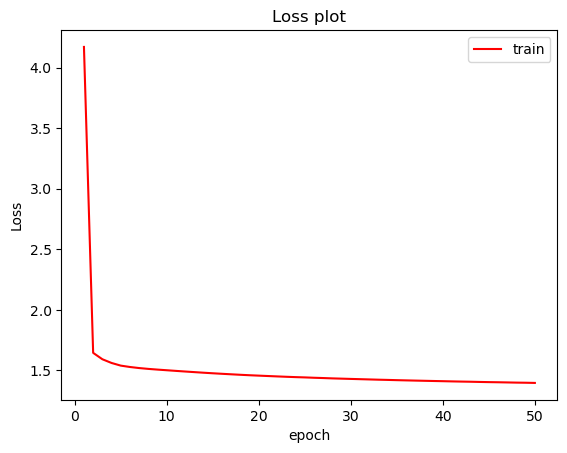

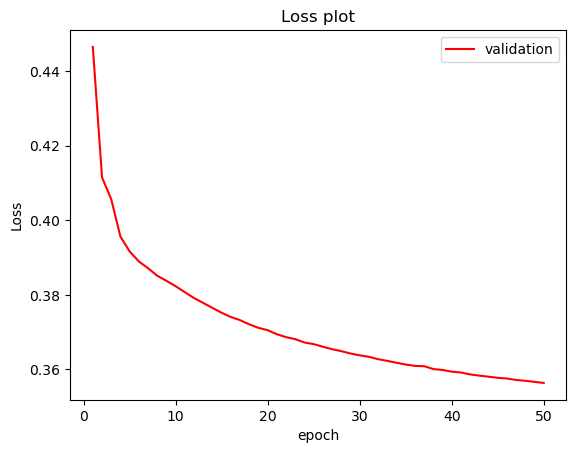

In [20]:
joint_model = train_the_model(joint_model, train_loader, val_loader, 'joint', num_epochs=50)
torch.save(joint_model, 'joint_model_50epochs_v2.pt')

In [ ]:
audio_text_model = train_the_model(audio_text_model, train_loader, val_loader, 'audio', num_epochs=50)
torch.save(audio_text_model, 'audio_text_model_50epochs_v2.pt')

Validation Loss: 0.0008: 100%|██████████| 714/714 [00:01<00:00, 428.53it/s]


Epoch 1 finished in 14.42s
[Epoch 1]	Train Loss: 7.654460	Validation Loss: 0.567703


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 434.63it/s]


Epoch 2 finished in 13.87s
[Epoch 2]	Train Loss: 1.990477	Validation Loss: 0.423231


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 439.08it/s]


Epoch 3 finished in 14.42s
[Epoch 3]	Train Loss: 1.636083	Validation Loss: 0.410533


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 401.12it/s]


Epoch 4 finished in 14.18s
[Epoch 4]	Train Loss: 1.598435	Validation Loss: 0.405730


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 443.86it/s]


Epoch 5 finished in 14.43s
[Epoch 5]	Train Loss: 1.574802	Validation Loss: 0.399064


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 407.75it/s]


Epoch 6 finished in 14.19s
[Epoch 6]	Train Loss: 1.555893	Validation Loss: 0.396019


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 433.75it/s]


Epoch 7 finished in 14.36s
[Epoch 7]	Train Loss: 1.546710	Validation Loss: 0.393875


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 413.88it/s]


Epoch 8 finished in 13.91s
[Epoch 8]	Train Loss: 1.539767	Validation Loss: 0.391898


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 422.72it/s]


Epoch 9 finished in 14.52s
[Epoch 9]	Train Loss: 1.533425	Validation Loss: 0.390601


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 415.96it/s]


Epoch 10 finished in 14.04s
[Epoch 10]	Train Loss: 1.528065	Validation Loss: 0.389028


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 412.64it/s]


Epoch 11 finished in 14.44s
[Epoch 11]	Train Loss: 1.523371	Validation Loss: 0.388021


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 417.25it/s]


Epoch 12 finished in 14.02s
[Epoch 12]	Train Loss: 1.519406	Validation Loss: 0.386998


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 397.03it/s]


Epoch 13 finished in 14.43s
[Epoch 13]	Train Loss: 1.515333	Validation Loss: 0.386169


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 410.56it/s]


Epoch 14 finished in 14.11s
[Epoch 14]	Train Loss: 1.511938	Validation Loss: 0.385223


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 367.73it/s]


Epoch 15 finished in 14.20s
[Epoch 15]	Train Loss: 1.508287	Validation Loss: 0.384273


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 404.27it/s]


Epoch 16 finished in 14.27s
[Epoch 16]	Train Loss: 1.504622	Validation Loss: 0.383572


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 433.04it/s]


Epoch 17 finished in 13.93s
[Epoch 17]	Train Loss: 1.501563	Validation Loss: 0.382609


Validation Loss: 0.0005: 100%|██████████| 714/714 [00:01<00:00, 411.03it/s]


Epoch 18 finished in 14.50s
[Epoch 18]	Train Loss: 1.498245	Validation Loss: 0.381638


Validation Loss: 0.0005:  70%|██████▉   | 497/714 [00:01<00:00, 439.24it/s]

In [ ]:
image_text_model = train_the_model(image_text_model, train_loader, val_loader, 'image', num_epochs=50)
torch.save(image_text_model, 'image_text_model_50epochs_v2.pt')

# Evaluation

In [57]:
test_len_data = len(total_dataset['test']['text'])

number_of_candidates_per_sample = 5
test_metadata = []

for index in range(test_len_data):
    candidate_indexes = random.sample([i for i in range(test_len_data) if i != index], number_of_candidates_per_sample - 1)
    candidate_indexes += [index]
    test_metadata.append(candidate_indexes)
len(test_metadata)

11411

In [58]:
class TestDataset(Dataset):
    def __init__(self, test_dataset, metadata):
        self.data = test_dataset
        self.metadata = metadata

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, index):
        candidate_indexes = self.metadata[index]
        text_embedding = self.data['text'][index]
        audio_embeddings = [self.data['audio'][i] for i in candidate_indexes]
        image_embeddings = [self.data['image'][i] for i in candidate_indexes]
        label_index = len(candidate_indexes) - 1
        audio_embeddings = torch.stack(audio_embeddings)
        image_embeddings = torch.stack(image_embeddings)

        return text_embedding, audio_embeddings, image_embeddings, label_index

In [59]:
test_dataset = TestDataset(total_dataset['test'], test_metadata)
test_final_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

In [60]:
def evaluate(model_path, mode='joint', threshold=0.5):
    model = torch.load(model_path)
    model.eval()
    model = model.to(device)

    def compute_cosine_similarity(embedding1: torch.Tensor, embedding2: torch.Tensor) -> float:
        similarity = cosine_similarity(embedding1.unsqueeze(0), embedding2.unsqueeze(0)).item()
        return similarity

    def cosine_similarity(embedding1, embedding2):
        dim = 1
        embedding1 = F.normalize(embedding1, p=2, dim=dim)
        embedding2 = F.normalize(embedding2, p=2, dim=dim)

        dot_product = torch.sum(embedding1 * embedding2, dim=dim)

        magnitude1 = torch.norm(embedding1, p=2, dim=dim)
        magnitude2 = torch.norm(embedding2, p=2, dim=dim)

        cosine_sim = dot_product / (magnitude1 * magnitude2)

        return cosine_sim
    
    def _evaluate(model, dataloader, threshold=0.5, mode='joint'):
        total_hits_1 = 0
        total_mrr = 0
        total_instances = 0
        total_labels = []
        total_predictions = []
        number_of_golden_predictions = 0

        with torch.no_grad():
            for text_embedding, audio_candidates, image_candidates, label in tqdm(dataloader):
                label = label[0]
                text_embedding = text_embedding[0].to(device)
                label = label.to(device)

                if mode == 'joint':   
                    audio_candidates = audio_candidates[0]
                    audio_candidates = audio_candidates.to(device)
                    
                    image_candidates = image_candidates[0]
                    image_candidates = image_candidates.to(device)
                    final_embs = model(audio_candidates, image_candidates)
                elif mode == 'audio':
                    audio_candidates = audio_candidates[0]
                    audio_candidates = audio_candidates.to(device)
                    final_embs = model(audio_candidates)
                elif mode == 'image':
                    image_candidates = image_candidates[0]
                    image_candidates = image_candidates.to(device)
                    final_embs = model(image_candidates)    
                
                text_candidate_cosine_similarities = [compute_cosine_similarity(text_embedding, item) for item in final_embs]
                predicted_idx = np.argmax(text_candidate_cosine_similarities)
                
                label_similarity = text_candidate_cosine_similarities[label.item()]

                # Compute Hits@1
                if predicted_idx == label.item():   
                    total_hits_1 += 1

                # Compute MRR
                label_rank = sum([1 for x in text_candidate_cosine_similarities if x > text_candidate_cosine_similarities[label.item()]])
                reciprocal_rank = 1 / (label_rank + 1)
                total_mrr += reciprocal_rank

                # Record predictions and labels
                predictions = [0 if sim < threshold else 1 for sim in text_candidate_cosine_similarities]
                total_labels.extend([0 if i != label.item() else 1 for i in range(len(text_candidate_cosine_similarities))])
                total_predictions.extend(predictions)
                if label_similarity >= threshold:
                    number_of_golden_predictions += 1

                total_instances += 1

        # Compute average metrics over all instances
        avg_hits_1 = total_hits_1 / total_instances
        avg_mrr = total_mrr / total_instances
        precision = precision_score(total_labels, total_predictions, average='macro')
        recall = recall_score(total_labels, total_predictions, average='macro')
        f1 = f1_score(total_labels, total_predictions, average='macro')
        precision_micro = precision_score(total_labels, total_predictions, average='micro')
        recall_micro = recall_score(total_labels, total_predictions, average='micro')
        f1_micro = f1_score(total_labels, total_predictions, average='micro')
        accuracy = accuracy_score(total_labels, total_predictions)
        golden_prediction_accuracy = number_of_golden_predictions / total_instances

        return {
            'Hits@1': avg_hits_1,
            'MRR': avg_mrr,
            'Macro Precision': precision,
            'Macro Recall': recall,
            'Macro F1': f1,
            'Micro Precision': precision_micro,
            'Micro Recall': recall_micro,
            'Micro F1': f1_micro,
            'Accuracy': accuracy,
            'Golden Accuracy': golden_prediction_accuracy,
        }
    
    results = _evaluate(model, test_final_loader, threshold=threshold, mode=mode)
    table = []
    for i in range(len(results)):
        table.append([list(results.keys())[i], list(results.values())[i]])
    print(tabulate(table, ['Metrics', 'Values'], tablefmt="grid"))


In [61]:
# 5 candidates
evaluate('joint_model_translation.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:28<00:00, 396.88it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.980195 |
+-----------------+----------+
| MRR             | 0.989745 |
+-----------------+----------+
| Macro Precision | 0.885158 |
+-----------------+----------+
| Macro Recall    | 0.90703  |
+-----------------+----------+
| Macro F1        | 0.895463 |
+-----------------+----------+
| Micro Precision | 0.931172 |
+-----------------+----------+
| Micro Recall    | 0.931172 |
+-----------------+----------+
| Micro F1        | 0.931172 |
+-----------------+----------+
| Accuracy        | 0.931172 |
+-----------------+----------+
| Golden Accuracy | 0.866795 |
+-----------------+----------+


In [25]:
# 5 candidates
evaluate('joint_model_translation_v2.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:29<00:00, 385.11it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.980983 |
+-----------------+----------+
| MRR             | 0.990115 |
+-----------------+----------+
| Macro Precision | 0.891825 |
+-----------------+----------+
| Macro Recall    | 0.910569 |
+-----------------+----------+
| Macro F1        | 0.900744 |
+-----------------+----------+
| Micro Precision | 0.93494  |
+-----------------+----------+
| Micro Recall    | 0.93494  |
+-----------------+----------+
| Micro F1        | 0.93494  |
+-----------------+----------+
| Accuracy        | 0.93494  |
+-----------------+----------+
| Golden Accuracy | 0.86995  |
+-----------------+----------+


In [41]:
# 10 candidates
evaluate('joint_model_translation.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:45<00:00, 253.08it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.96109  |
+-----------------+----------+
| MRR             | 0.979341 |
+-----------------+----------+
| Macro Precision | 0.815586 |
+-----------------+----------+
| Macro Recall    | 0.907073 |
+-----------------+----------+
| Macro F1        | 0.853137 |
+-----------------+----------+
| Micro Precision | 0.939295 |
+-----------------+----------+
| Micro Recall    | 0.939295 |
+-----------------+----------+
| Micro F1        | 0.939295 |
+-----------------+----------+
| Accuracy        | 0.939295 |
+-----------------+----------+
| Golden Accuracy | 0.866795 |
+-----------------+----------+


In [42]:
# 10 candidates
evaluate('joint_model_translation_v2.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:43<00:00, 260.70it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.963807 |
+-----------------+----------+
| MRR             | 0.98051  |
+-----------------+----------+
| Macro Precision | 0.820517 |
+-----------------+----------+
| Macro Recall    | 0.909634 |
+-----------------+----------+
| Macro F1        | 0.857413 |
+-----------------+----------+
| Micro Precision | 0.941381 |
+-----------------+----------+
| Micro Recall    | 0.941381 |
+-----------------+----------+
| Micro F1        | 0.941381 |
+-----------------+----------+
| Accuracy        | 0.941381 |
+-----------------+----------+
| Golden Accuracy | 0.86995  |
+-----------------+----------+


In [43]:
evaluate('joint_model_v3.pt', mode='joint')

100%|██████████| 11411/11411 [00:32<00:00, 348.30it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.97739  |
+-----------------+----------+
| MRR             | 0.988152 |
+-----------------+----------+
| Macro Precision | 0.912892 |
+-----------------+----------+
| Macro Recall    | 0.73198  |
+-----------------+----------+
| Macro F1        | 0.781384 |
+-----------------+----------+
| Micro Precision | 0.888546 |
+-----------------+----------+
| Micro Recall    | 0.888546 |
+-----------------+----------+
| Micro F1        | 0.888546 |
+-----------------+----------+
| Accuracy        | 0.888546 |
+-----------------+----------+
| Golden Accuracy | 0.471037 |
+-----------------+----------+


In [44]:
evaluate('joint_model_v3.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:33<00:00, 343.72it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.97739  |
+-----------------+----------+
| MRR             | 0.988152 |
+-----------------+----------+
| Macro Precision | 0.87851  |
+-----------------+----------+
| Macro Recall    | 0.900688 |
+-----------------+----------+
| Macro F1        | 0.888935 |
+-----------------+----------+
| Micro Precision | 0.926807 |
+-----------------+----------+
| Micro Recall    | 0.926807 |
+-----------------+----------+
| Micro F1        | 0.926807 |
+-----------------+----------+
| Accuracy        | 0.926807 |
+-----------------+----------+
| Golden Accuracy | 0.857155 |
+-----------------+----------+


In [46]:
evaluate('joint_model_v3.pt', mode='joint', threshold=0.35)

100%|██████████| 11411/11411 [00:35<00:00, 320.08it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.97739  |
+-----------------+----------+
| MRR             | 0.988152 |
+-----------------+----------+
| Macro Precision | 0.815863 |
+-----------------+----------+
| Macro Recall    | 0.908082 |
+-----------------+----------+
| Macro F1        | 0.846343 |
+-----------------+----------+
| Micro Precision | 0.886005 |
+-----------------+----------+
| Micro Recall    | 0.886005 |
+-----------------+----------+
| Micro F1        | 0.886005 |
+-----------------+----------+
| Accuracy        | 0.886005 |
+-----------------+----------+
| Golden Accuracy | 0.944878 |
+-----------------+----------+


In [47]:
evaluate('joint_model_v3.pt', mode='joint', threshold=0.45)

100%|██████████| 11411/11411 [00:34<00:00, 330.09it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.97739  |
+-----------------+----------+
| MRR             | 0.988152 |
+-----------------+----------+
| Macro Precision | 0.910368 |
+-----------------+----------+
| Macro Recall    | 0.837427 |
+-----------------+----------+
| Macro F1        | 0.86744  |
+-----------------+----------+
| Micro Precision | 0.922443 |
+-----------------+----------+
| Micro Recall    | 0.922443 |
+-----------------+----------+
| Micro F1        | 0.922443 |
+-----------------+----------+
| Accuracy        | 0.922443 |
+-----------------+----------+
| Golden Accuracy | 0.695732 |
+-----------------+----------+


In [33]:
evaluate('joint_model_v2.pt', mode='joint')

100%|██████████| 11411/11411 [00:29<00:00, 390.10it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.975287 |
+-----------------+----------+
| MRR             | 0.98709  |
+-----------------+----------+
| Macro Precision | 0.910495 |
+-----------------+----------+
| Macro Recall    | 0.724312 |
+-----------------+----------+
| Macro F1        | 0.773455 |
+-----------------+----------+
| Micro Precision | 0.885479 |
+-----------------+----------+
| Micro Recall    | 0.885479 |
+-----------------+----------+
| Micro F1        | 0.885479 |
+-----------------+----------+
| Accuracy        | 0.885479 |
+-----------------+----------+
| Golden Accuracy | 0.455701 |
+-----------------+----------+


In [34]:
evaluate('joint_model.pt', mode='joint')

100%|██████████| 11411/11411 [00:29<00:00, 393.36it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.973359 |
+-----------------+----------+
| MRR             | 0.986031 |
+-----------------+----------+
| Macro Precision | 0.900758 |
+-----------------+----------+
| Macro Recall    | 0.702688 |
+-----------------+----------+
| Macro F1        | 0.749973 |
+-----------------+----------+
| Micro Precision | 0.876435 |
+-----------------+----------+
| Micro Recall    | 0.876435 |
+-----------------+----------+
| Micro F1        | 0.876435 |
+-----------------+----------+
| Accuracy        | 0.876435 |
+-----------------+----------+
| Golden Accuracy | 0.41311  |
+-----------------+----------+


In [16]:
evaluate('audio_text_model.pt', mode='audio')

100%|██████████| 11411/11411 [00:23<00:00, 481.44it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.972833 |
+-----------------+----------+
| MRR             | 0.985884 |
+-----------------+----------+
| Macro Precision | 0.889414 |
+-----------------+----------+
| Macro Recall    | 0.680834 |
+-----------------+----------+
| Macro F1        | 0.725007 |
+-----------------+----------+
| Micro Precision | 0.867233 |
+-----------------+----------+
| Micro Recall    | 0.867233 |
+-----------------+----------+
| Micro F1        | 0.867233 |
+-----------------+----------+
| Accuracy        | 0.867233 |
+-----------------+----------+
| Golden Accuracy | 0.370169 |
+-----------------+----------+


In [17]:
evaluate('image_text_model.pt', mode='image')

100%|██████████| 11411/11411 [00:21<00:00, 529.56it/s]


+-----------------+-----------+
| Metrics         |    Values |
+=================+===========+
| Hits@1          | 0.613268  |
+-----------------+-----------+
| MRR             | 0.777311  |
+-----------------+-----------+
| Macro Precision | 0.642991  |
+-----------------+-----------+
| Macro Recall    | 0.535437  |
+-----------------+-----------+
| Macro F1        | 0.523788  |
+-----------------+-----------+
| Micro Precision | 0.797862  |
+-----------------+-----------+
| Micro Recall    | 0.797862  |
+-----------------+-----------+
| Micro F1        | 0.797862  |
+-----------------+-----------+
| Accuracy        | 0.797862  |
+-----------------+-----------+
| Golden Accuracy | 0.0980633 |
+-----------------+-----------+


In [30]:
evaluate('joint_model_50epochs.pt', mode='joint')

100%|██████████| 11411/11411 [00:29<00:00, 381.51it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.946806 |
+-----------------+----------+
| MRR             | 0.972094 |
+-----------------+----------+
| Macro Precision | 0.863804 |
+-----------------+----------+
| Macro Recall    | 0.647719 |
+-----------------+----------+
| Macro F1        | 0.684354 |
+-----------------+----------+
| Micro Precision | 0.852633 |
+-----------------+----------+
| Micro Recall    | 0.852633 |
+-----------------+----------+
| Micro F1        | 0.852633 |
+-----------------+----------+
| Accuracy        | 0.852633 |
+-----------------+----------+
| Golden Accuracy | 0.306196 |
+-----------------+----------+


In [31]:
evaluate('audio_text_model_50epochs.pt', mode='audio')

100%|██████████| 11411/11411 [00:22<00:00, 513.25it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.947594 |
+-----------------+----------+
| MRR             | 0.972585 |
+-----------------+----------+
| Macro Precision | 0.850292 |
+-----------------+----------+
| Macro Recall    | 0.631901 |
+-----------------+----------+
| Macro F1        | 0.663924 |
+-----------------+----------+
| Micro Precision | 0.84578  |
+-----------------+----------+
| Micro Recall    | 0.84578  |
+-----------------+----------+
| Micro F1        | 0.84578  |
+-----------------+----------+
| Accuracy        | 0.84578  |
+-----------------+----------+
| Golden Accuracy | 0.275436 |
+-----------------+----------+


In [32]:
evaluate('image_text_model_50epochs.pt', mode='image')

100%|██████████| 11411/11411 [00:22<00:00, 516.60it/s]


+-----------------+-----------+
| Metrics         |    Values |
+=================+===========+
| Hits@1          | 0.581281  |
+-----------------+-----------+
| MRR             | 0.756557  |
+-----------------+-----------+
| Macro Precision | 0.627856  |
+-----------------+-----------+
| Macro Recall    | 0.531494  |
+-----------------+-----------+
| Macro F1        | 0.51776   |
+-----------------+-----------+
| Micro Precision | 0.795496  |
+-----------------+-----------+
| Micro Recall    | 0.795496  |
+-----------------+-----------+
| Micro F1        | 0.795496  |
+-----------------+-----------+
| Accuracy        | 0.795496  |
+-----------------+-----------+
| Golden Accuracy | 0.0914907 |
+-----------------+-----------+


In [48]:
evaluate('joint_model_50epochs.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:34<00:00, 327.81it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.946806 |
+-----------------+----------+
| MRR             | 0.972094 |
+-----------------+----------+
| Macro Precision | 0.804012 |
+-----------------+----------+
| Macro Recall    | 0.828762 |
+-----------------+----------+
| Macro F1        | 0.81528  |
+-----------------+----------+
| Micro Precision | 0.876873 |
+-----------------+----------+
| Micro Recall    | 0.876873 |
+-----------------+----------+
| Micro F1        | 0.876873 |
+-----------------+----------+
| Accuracy        | 0.876873 |
+-----------------+----------+
| Golden Accuracy | 0.748576 |
+-----------------+----------+


In [49]:
evaluate('audio_text_model_50epochs.pt', mode='audio', threshold=0.4)

100%|██████████| 11411/11411 [00:24<00:00, 458.32it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.947594 |
+-----------------+----------+
| MRR             | 0.972585 |
+-----------------+----------+
| Macro Precision | 0.784803 |
+-----------------+----------+
| Macro Recall    | 0.812078 |
+-----------------+----------+
| Macro F1        | 0.796969 |
+-----------------+----------+
| Micro Precision | 0.863693 |
+-----------------+----------+
| Micro Recall    | 0.863693 |
+-----------------+----------+
| Micro F1        | 0.863693 |
+-----------------+----------+
| Accuracy        | 0.863693 |
+-----------------+----------+
| Golden Accuracy | 0.726054 |
+-----------------+----------+


In [37]:
evaluate('joint_model_50epochs_v2.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:28<00:00, 395.92it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.964508 |
+-----------------+----------+
| MRR             | 0.981503 |
+-----------------+----------+
| Macro Precision | 0.831846 |
+-----------------+----------+
| Macro Recall    | 0.8587   |
+-----------------+----------+
| Macro F1        | 0.844114 |
+-----------------+----------+
| Micro Precision | 0.896118 |
+-----------------+----------+
| Micro Recall    | 0.896118 |
+-----------------+----------+
| Micro F1        | 0.896118 |
+-----------------+----------+
| Accuracy        | 0.896118 |
+-----------------+----------+
| Golden Accuracy | 0.796337 |
+-----------------+----------+


In [38]:
evaluate('audio_text_model_50epochs_v2.pt', mode='audio', threshold=0.4)

100%|██████████| 11411/11411 [00:22<00:00, 518.19it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.948646 |
+-----------------+----------+
| MRR             | 0.972874 |
+-----------------+----------+
| Macro Precision | 0.789402 |
+-----------------+----------+
| Macro Recall    | 0.814225 |
+-----------------+----------+
| Macro F1        | 0.800623 |
+-----------------+----------+
| Micro Precision | 0.866813 |
+-----------------+----------+
| Micro Recall    | 0.866813 |
+-----------------+----------+
| Micro F1        | 0.866813 |
+-----------------+----------+
| Accuracy        | 0.866813 |
+-----------------+----------+
| Golden Accuracy | 0.72658  |
+-----------------+----------+


In [39]:
evaluate('image_text_model_50epochs_v2.pt', mode='image', threshold=0.4)

100%|██████████| 11411/11411 [00:21<00:00, 521.12it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.588555 |
+-----------------+----------+
| MRR             | 0.761233 |
+-----------------+----------+
| Macro Precision | 0.607948 |
+-----------------+----------+
| Macro Recall    | 0.618066 |
+-----------------+----------+
| Macro F1        | 0.612157 |
+-----------------+----------+
| Micro Precision | 0.739883 |
+-----------------+----------+
| Micro Recall    | 0.739883 |
+-----------------+----------+
| Micro F1        | 0.739883 |
+-----------------+----------+
| Accuracy        | 0.739883 |
+-----------------+----------+
| Golden Accuracy | 0.415038 |
+-----------------+----------+


In [40]:
evaluate('joint_model_v4n_150.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:29<00:00, 389.31it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.979581 |
+-----------------+----------+
| MRR             | 0.989358 |
+-----------------+----------+
| Macro Precision | 0.880296 |
+-----------------+----------+
| Macro Recall    | 0.903383 |
+-----------------+----------+
| Macro F1        | 0.891125 |
+-----------------+----------+
| Micro Precision | 0.928175 |
+-----------------+----------+
| Micro Recall    | 0.928175 |
+-----------------+----------+
| Micro F1        | 0.928175 |
+-----------------+----------+
| Accuracy        | 0.928175 |
+-----------------+----------+
| Golden Accuracy | 0.862063 |
+-----------------+----------+


In [41]:
evaluate('joint_model_v4n_250.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:28<00:00, 397.16it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.980195 |
+-----------------+----------+
| MRR             | 0.989687 |
+-----------------+----------+
| Macro Precision | 0.886623 |
+-----------------+----------+
| Macro Recall    | 0.907589 |
+-----------------+----------+
| Macro F1        | 0.896529 |
+-----------------+----------+
| Micro Precision | 0.93196  |
+-----------------+----------+
| Micro Recall    | 0.93196  |
+-----------------+----------+
| Micro F1        | 0.93196  |
+-----------------+----------+
| Accuracy        | 0.93196  |
+-----------------+----------+
| Golden Accuracy | 0.86697  |
+-----------------+----------+


## 10 candidates

In [53]:
evaluate('joint_model_50epochs_v2.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:43<00:00, 262.46it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.935063 |
+-----------------+----------+
| MRR             | 0.964547 |
+-----------------+----------+
| Macro Precision | 0.752523 |
+-----------------+----------+
| Macro Recall    | 0.858781 |
+-----------------+----------+
| Macro F1        | 0.791778 |
+-----------------+----------+
| Micro Precision | 0.908737 |
+-----------------+----------+
| Micro Recall    | 0.908737 |
+-----------------+----------+
| Micro F1        | 0.908737 |
+-----------------+----------+
| Accuracy        | 0.908737 |
+-----------------+----------+
| Golden Accuracy | 0.796337 |
+-----------------+----------+


In [54]:
evaluate('audio_text_model_50epochs_v2.pt', mode='audio', threshold=0.4)

100%|██████████| 11411/11411 [00:35<00:00, 324.44it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.904215 |
+-----------------+----------+
| MRR             | 0.946709 |
+-----------------+----------+
| Macro Precision | 0.711662 |
+-----------------+----------+
| Macro Recall    | 0.815105 |
+-----------------+----------+
| Macro F1        | 0.747342 |
+-----------------+----------+
| Micro Precision | 0.885926 |
+-----------------+----------+
| Micro Recall    | 0.885926 |
+-----------------+----------+
| Micro F1        | 0.885926 |
+-----------------+----------+
| Accuracy        | 0.885926 |
+-----------------+----------+
| Golden Accuracy | 0.72658  |
+-----------------+----------+


In [55]:
evaluate('image_text_model_50epochs_v2.pt', mode='image', threshold=0.4)

100%|██████████| 11411/11411 [00:36<00:00, 315.56it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.39865  |
+-----------------+----------+
| MRR             | 0.610014 |
+-----------------+----------+
| Macro Precision | 0.566854 |
+-----------------+----------+
| Macro Recall    | 0.619125 |
+-----------------+----------+
| Macro F1        | 0.574039 |
+-----------------+----------+
| Micro Precision | 0.782394 |
+-----------------+----------+
| Micro Recall    | 0.782394 |
+-----------------+----------+
| Micro F1        | 0.782394 |
+-----------------+----------+
| Accuracy        | 0.782394 |
+-----------------+----------+
| Golden Accuracy | 0.415038 |
+-----------------+----------+


In [56]:
evaluate('joint_model_v4n_250.pt', mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:42<00:00, 271.11it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.963632 |
+-----------------+----------+
| MRR             | 0.980433 |
+-----------------+----------+
| Macro Precision | 0.821448 |
+-----------------+----------+
| Macro Recall    | 0.908475 |
+-----------------+----------+
| Macro F1        | 0.857663 |
+-----------------+----------+
| Micro Precision | 0.941679 |
+-----------------+----------+
| Micro Recall    | 0.941679 |
+-----------------+----------+
| Micro F1        | 0.941679 |
+-----------------+----------+
| Accuracy        | 0.941679 |
+-----------------+----------+
| Golden Accuracy | 0.86697  |
+-----------------+----------+


# Multilingual

In [4]:
! pip install sentencepiece
!pip install transformers
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=42cd5a478cc4d285814a4515874aaa4481d61527df5c66e2a2b0d7eec2ec6464
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [5]:
# Copyright (c) 2022 Idiap Research Institute, http://www.idiap.ch/
# Written by Alireza Mohammadshahi <alireza.mohammadshahi@idiap.ch>
# This is a modified version of https://github.com/huggingface/transformers/blob/main/src/transformers/models/m2m_100/tokenization_m2m_100.py 
# which owns by Fariseq Authors and The HuggingFace Inc. team.
#
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
"""Tokenization classes for SMALL100."""
import json
import os
from pathlib import Path
from shutil import copyfile
from typing import Any, Dict, List, Optional, Tuple, Union

import sentencepiece

from transformers.tokenization_utils import BatchEncoding, PreTrainedTokenizer
from transformers.utils import logging


logger = logging.get_logger(__name__)

SPIECE_UNDERLINE = "▁"

VOCAB_FILES_NAMES = {
    "vocab_file": "vocab.json",
    "spm_file": "sentencepiece.bpe.model",
    "tokenizer_config_file": "tokenizer_config.json",
}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "alirezamsh/small100": "https://huggingface.co/alirezamsh/small100/resolve/main/vocab.json",
    },
    "spm_file": {
        "alirezamsh/small100": "https://huggingface.co/alirezamsh/small100/resolve/main/sentencepiece.bpe.model",
    },
    "tokenizer_config_file": {
        "alirezamsh/small100": "https://huggingface.co/alirezamsh/small100/resolve/main/tokenizer_config.json",
    },
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "alirezamsh/small100": 1024,
}

# fmt: off
FAIRSEQ_LANGUAGE_CODES = {
    "m2m100": ["af", "am", "ar", "ast", "az", "ba", "be", "bg", "bn", "br", "bs", "ca", "ceb", "cs", "cy", "da", "de", "el", "en", "es", "et", "fa", "ff", "fi", "fr", "fy", "ga", "gd", "gl", "gu", "ha", "he", "hi", "hr", "ht", "hu", "hy", "id", "ig", "ilo", "is", "it", "ja", "jv", "ka", "kk", "km", "kn", "ko", "lb", "lg", "ln", "lo", "lt", "lv", "mg", "mk", "ml", "mn", "mr", "ms", "my", "ne", "nl", "no", "ns", "oc", "or", "pa", "pl", "ps", "pt", "ro", "ru", "sd", "si", "sk", "sl", "so", "sq", "sr", "ss", "su", "sv", "sw", "ta", "th", "tl", "tn", "tr", "uk", "ur", "uz", "vi", "wo", "xh", "yi", "yo", "zh", "zu"]
}
# fmt: on


class SMALL100Tokenizer(PreTrainedTokenizer):
    """
    Construct an SMALL100 tokenizer. Based on [SentencePiece](https://github.com/google/sentencepiece).
    This tokenizer inherits from [`PreTrainedTokenizer`] which contains most of the main methods. Users should refer to
    this superclass for more information regarding those methods.
    Args:
        vocab_file (`str`):
            Path to the vocabulary file.
        spm_file (`str`):
            Path to [SentencePiece](https://github.com/google/sentencepiece) file (generally has a .spm extension) that
            contains the vocabulary.
        tgt_lang (`str`, *optional*):
            A string representing the target language.
        eos_token (`str`, *optional*, defaults to `"</s>"`):
            The end of sequence token.
        sep_token (`str`, *optional*, defaults to `"</s>"`):
            The separator token, which is used when building a sequence from multiple sequences, e.g. two sequences for
            sequence classification or for a text and a question for question answering. It is also used as the last
            token of a sequence built with special tokens.
        unk_token (`str`, *optional*, defaults to `"<unk>"`):
            The unknown token. A token that is not in the vocabulary cannot be converted to an ID and is set to be this
            token instead.
        pad_token (`str`, *optional*, defaults to `"<pad>"`):
            The token used for padding, for example when batching sequences of different lengths.
        language_codes (`str`, *optional*):
            What language codes to use. Should be `"m2m100"`.
        sp_model_kwargs (`dict`, *optional*):
            Will be passed to the `SentencePieceProcessor.__init__()` method. The [Python wrapper for
            SentencePiece](https://github.com/google/sentencepiece/tree/master/python) can be used, among other things,
            to set:
            - `enable_sampling`: Enable subword regularization.
            - `nbest_size`: Sampling parameters for unigram. Invalid for BPE-Dropout.
              - `nbest_size = {0,1}`: No sampling is performed.
              - `nbest_size > 1`: samples from the nbest_size results.
              - `nbest_size < 0`: assuming that nbest_size is infinite and samples from the all hypothesis (lattice)
                using forward-filtering-and-backward-sampling algorithm.
            - `alpha`: Smoothing parameter for unigram sampling, and dropout probability of merge operations for
              BPE-dropout.
    Examples:
    ```python
    >>> from tokenization_small100 import SMALL100Tokenizer
    >>> tokenizer = SMALL100Tokenizer.from_pretrained("alirezamsh/small100", tgt_lang="ro")
    >>> src_text = " UN Chief Says There Is No Military Solution in Syria"
    >>> tgt_text = "Şeful ONU declară că nu există o soluţie militară în Siria"
    >>> model_inputs = tokenizer(src_text, text_target=tgt_text, return_tensors="pt")
    >>> model(**model_inputs)  # should work
    ```"""

    vocab_files_names = VOCAB_FILES_NAMES
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    model_input_names = ["input_ids", "attention_mask"]

    prefix_tokens: List[int] = []
    suffix_tokens: List[int] = []

    def __init__(
        self,
        vocab_file,
        spm_file,
        tgt_lang=None,
        bos_token="<s>",
        eos_token="</s>",
        sep_token="</s>",
        pad_token="<pad>",
        unk_token="<unk>",
        language_codes="m2m100",
        sp_model_kwargs: Optional[Dict[str, Any]] = None,
        num_madeup_words=8,
        **kwargs,
    ) -> None:
        self.sp_model_kwargs = {} if sp_model_kwargs is None else sp_model_kwargs

        self.language_codes = language_codes
        fairseq_language_code = FAIRSEQ_LANGUAGE_CODES[language_codes]
        self.lang_code_to_token = {lang_code: f"__{lang_code}__" for lang_code in fairseq_language_code}

        kwargs["additional_special_tokens"] = kwargs.get("additional_special_tokens", [])
        kwargs["additional_special_tokens"] += [
            self.get_lang_token(lang_code)
            for lang_code in fairseq_language_code
            if self.get_lang_token(lang_code) not in kwargs["additional_special_tokens"]
        ]

        super().__init__(
            tgt_lang=tgt_lang,
            bos_token=bos_token,
            eos_token=eos_token,
            sep_token=sep_token,
            unk_token=unk_token,
            pad_token=pad_token,
            language_codes=language_codes,
            sp_model_kwargs=self.sp_model_kwargs,
            num_madeup_words=num_madeup_words,
            **kwargs,
        )

        self.vocab_file = vocab_file
        self.encoder = load_json(vocab_file)
        self.decoder = {v: k for k, v in self.encoder.items()}
        self.spm_file = spm_file
        self.sp_model = load_spm(spm_file, self.sp_model_kwargs)

        self.encoder_size = len(self.encoder)

        self.lang_token_to_id = {
            self.get_lang_token(lang_code): self.encoder_size + i for i, lang_code in enumerate(fairseq_language_code)
        }
        self.lang_code_to_id = {lang_code: self.encoder_size + i for i, lang_code in enumerate(fairseq_language_code)}
        self.id_to_lang_token = {v: k for k, v in self.lang_token_to_id.items()}

        self._tgt_lang = tgt_lang if tgt_lang is not None else "en"
        self.cur_lang_id = self.get_lang_id(self._tgt_lang)
        self.set_lang_special_tokens(self._tgt_lang)

        self.num_madeup_words = num_madeup_words

    @property
    def vocab_size(self) -> int:
        return len(self.encoder) + len(self.lang_token_to_id) + self.num_madeup_words

    @property
    def tgt_lang(self) -> str:
        return self._tgt_lang

    @tgt_lang.setter
    def tgt_lang(self, new_tgt_lang: str) -> None:
        self._tgt_lang = new_tgt_lang
        self.set_lang_special_tokens(self._tgt_lang)

    def _tokenize(self, text: str) -> List[str]:
        return self.sp_model.encode(text, out_type=str)

    def _convert_token_to_id(self, token):
        if token in self.lang_token_to_id:
            return self.lang_token_to_id[token]
        return self.encoder.get(token, self.encoder[self.unk_token])

    def _convert_id_to_token(self, index: int) -> str:
        """Converts an index (integer) in a token (str) using the decoder."""
        if index in self.id_to_lang_token:
            return self.id_to_lang_token[index]
        return self.decoder.get(index, self.unk_token)

    def convert_tokens_to_string(self, tokens: List[str]) -> str:
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        return self.sp_model.decode(tokens)

    def get_special_tokens_mask(
        self, token_ids_0: List[int], token_ids_1: Optional[List[int]] = None, already_has_special_tokens: bool = False
    ) -> List[int]:
        """
        Retrieve sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer `prepare_for_model` method.
        Args:
            token_ids_0 (`List[int]`):
                List of IDs.
            token_ids_1 (`List[int]`, *optional*):
                Optional second list of IDs for sequence pairs.
            already_has_special_tokens (`bool`, *optional*, defaults to `False`):
                Whether or not the token list is already formatted with special tokens for the model.
        Returns:
            `List[int]`: A list of integers in the range [0, 1]: 1 for a special token, 0 for a sequence token.
        """

        if already_has_special_tokens:
            return super().get_special_tokens_mask(
                token_ids_0=token_ids_0, token_ids_1=token_ids_1, already_has_special_tokens=True
            )

        prefix_ones = [1] * len(self.prefix_tokens)
        suffix_ones = [1] * len(self.suffix_tokens)
        if token_ids_1 is None:
            return prefix_ones + ([0] * len(token_ids_0)) + suffix_ones
        return prefix_ones + ([0] * len(token_ids_0)) + ([0] * len(token_ids_1)) + suffix_ones

    def build_inputs_with_special_tokens(
        self, token_ids_0: List[int], token_ids_1: Optional[List[int]] = None
    ) -> List[int]:
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks by concatenating and
        adding special tokens. An MBART sequence has the following format, where `X` represents the sequence:
        - `input_ids` (for encoder) `X [eos, src_lang_code]`
        - `decoder_input_ids`: (for decoder) `X [eos, tgt_lang_code]`
        BOS is never used. Pairs of sequences are not the expected use case, but they will be handled without a
        separator.
        Args:
            token_ids_0 (`List[int]`):
                List of IDs to which the special tokens will be added.
            token_ids_1 (`List[int]`, *optional*):
                Optional second list of IDs for sequence pairs.
        Returns:
            `List[int]`: List of [input IDs](../glossary#input-ids) with the appropriate special tokens.
        """
        if token_ids_1 is None:
            if self.prefix_tokens is None:
                return token_ids_0 + self.suffix_tokens
            else:
                return self.prefix_tokens + token_ids_0 + self.suffix_tokens
        # We don't expect to process pairs, but leave the pair logic for API consistency
        if self.prefix_tokens is None:
            return token_ids_0 + token_ids_1 + self.suffix_tokens
        else:
            return self.prefix_tokens + token_ids_0 + token_ids_1 + self.suffix_tokens

    def get_vocab(self) -> Dict:
        vocab = {self.convert_ids_to_tokens(i): i for i in range(self.vocab_size)}
        vocab.update(self.added_tokens_encoder)
        return vocab

    def __getstate__(self) -> Dict:
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d: Dict) -> None:
        self.__dict__ = d

        # for backward compatibility
        if not hasattr(self, "sp_model_kwargs"):
            self.sp_model_kwargs = {}

        self.sp_model = load_spm(self.spm_file, self.sp_model_kwargs)

    def save_vocabulary(self, save_directory: str, filename_prefix: Optional[str] = None) -> Tuple[str]:
        save_dir = Path(save_directory)
        if not save_dir.is_dir():
            raise OSError(f"{save_directory} should be a directory")
        vocab_save_path = save_dir / (
            (filename_prefix + "-" if filename_prefix else "") + self.vocab_files_names["vocab_file"]
        )
        spm_save_path = save_dir / (
            (filename_prefix + "-" if filename_prefix else "") + self.vocab_files_names["spm_file"]
        )

        save_json(self.encoder, vocab_save_path)

        if os.path.abspath(self.spm_file) != os.path.abspath(spm_save_path) and os.path.isfile(self.spm_file):
            copyfile(self.spm_file, spm_save_path)
        elif not os.path.isfile(self.spm_file):
            with open(spm_save_path, "wb") as fi:
                content_spiece_model = self.sp_model.serialized_model_proto()
                fi.write(content_spiece_model)

        return (str(vocab_save_path), str(spm_save_path))

    def prepare_seq2seq_batch(
        self,
        src_texts: List[str],
        tgt_texts: Optional[List[str]] = None,
        tgt_lang: str = "ro",
        **kwargs,
    ) -> BatchEncoding:
        self.tgt_lang = tgt_lang
        self.set_lang_special_tokens(self.tgt_lang)
        return super().prepare_seq2seq_batch(src_texts, tgt_texts, **kwargs)

    def _build_translation_inputs(self, raw_inputs, tgt_lang: Optional[str], **extra_kwargs):
        """Used by translation pipeline, to prepare inputs for the generate function"""
        if tgt_lang is None:
            raise ValueError("Translation requires a `tgt_lang` for this model")
        self.tgt_lang = tgt_lang
        inputs = self(raw_inputs, add_special_tokens=True, **extra_kwargs)
        return inputs

    def _switch_to_input_mode(self):
        self.set_lang_special_tokens(self.tgt_lang)

    def _switch_to_target_mode(self):
        self.prefix_tokens = None
        self.suffix_tokens = [self.eos_token_id]        

    def set_lang_special_tokens(self, src_lang: str) -> None:
        """Reset the special tokens to the tgt lang setting. No prefix and suffix=[eos, tgt_lang_code]."""
        lang_token = self.get_lang_token(src_lang)
        self.cur_lang_id = self.lang_token_to_id[lang_token]
        self.prefix_tokens = [self.cur_lang_id]
        self.suffix_tokens = [self.eos_token_id]

    def get_lang_token(self, lang: str) -> str:
        return self.lang_code_to_token[lang]

    def get_lang_id(self, lang: str) -> int:
        lang_token = self.get_lang_token(lang)
        return self.lang_token_to_id[lang_token]


def load_spm(path: str, sp_model_kwargs: Dict[str, Any]) -> sentencepiece.SentencePieceProcessor:
    spm = sentencepiece.SentencePieceProcessor(**sp_model_kwargs)
    spm.Load(str(path))
    return spm


def load_json(path: str) -> Union[Dict, List]:
    with open(path, "r") as f:
        return json.load(f)


def save_json(data, path: str) -> None:
    with open(path, "w") as f:
        json.dump(data, f, indent=2)


In [6]:
from transformers import M2M100ForConditionalGeneration


model = M2M100ForConditionalGeneration.from_pretrained("alirezamsh/small100").to(device)
tokenizer = SMALL100Tokenizer.from_pretrained("alirezamsh/small100")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'M2M100Tokenizer'. 
The class this function is called from is 'SMALL100Tokenizer'.


In [7]:
def translate(text, target_lang='fa'):
    tokenizer.tgt_lang = target_lang
    encoded_zh = tokenizer(text, return_tensors="pt", padding=True).to(device)
    generated_tokens = model.generate(**encoded_zh)
    return tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

In [8]:
translate(['hi i am good', 'this is water'])

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (256) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['سلام من خوب هستم', 'این آب است']

In [9]:
translate(['سلام من خوب هستم', 'این آب است'], target_lang='en')

['Hello I am fine.', 'This is water.']

## prepare dataset

In [10]:
from sentence_transformers import SentenceTransformer

text_model = SentenceTransformer('sentence-transformers/LaBSE').to(device)

In [11]:
a = text_model.encode(translate(['hi i am good', 'this is water']))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
a.shape

(2, 768)

In [18]:
for i in a:
    print(i.shape)

(768,)
(768,)


In [62]:
with open('total_dataset_v2_with_text.pkl', 'rb') as f:
    total_dataset = pickle.load(f)

In [63]:
total_dataset['train'].keys()

dict_keys(['audio', 'image', 'text', 'pure-text'])

In [64]:
test_len_data = len(total_dataset['test']['text'])

number_of_candidates_per_sample = 5
test_metadata = []

for index in range(test_len_data):
    candidate_indexes = random.sample([i for i in range(test_len_data) if i != index], number_of_candidates_per_sample - 1)
    candidate_indexes += [index]
    test_metadata.append(candidate_indexes)
len(test_metadata)

11411

In [66]:
class TestDatasetV2(Dataset):
    def __init__(self, test_dataset, metadata, target_lang='fa', load=False, batch_size=128):
        self.data = test_dataset
        if load:
            with open(f'translated-text-embeddings-test-{target_lang}.pkl', 'rb') as f:
                self.data['translated-text-embeddings'] = pickle.load(f)
        else:
            self.data['translated-text-embeddings'] = []
            for s in tqdm(self.batch(self.data['pure-text'], batch_size)):
                self.data['translated-text-embeddings'].extend(torch.Tensor(text_model.encode(translate(s, target_lang))))
            with open(f'translated-text-embeddings-test-{target_lang}.pkl', 'wb') as f:
                pickle.dump(self.data['translated-text-embeddings'], f)
        
        self.data['translated-text-embeddings'] = torch.stack(self.data['translated-text-embeddings'])
        self.data['translated-text-embeddings'] = F.normalize(self.data['translated-text-embeddings'], dim=1)
    
        
        
        self.metadata = metadata
        self.target_lang = target_lang
        

    def batch(self, iterable, n=1):
        l = len(iterable)
        for ndx in range(0, l, n):
            yield iterable[ndx:min(ndx + n, l)]

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, index):
        candidate_indexes = self.metadata[index]
        text = self.data['pure-text'][index]
#         text_embedding = self.data['text'][index]
        text_embedding = self.data['translated-text-embeddings'][index]
        audio_embeddings = [self.data['audio'][i] for i in candidate_indexes]
        image_embeddings = [self.data['image'][i] for i in candidate_indexes]
        label_index = 4
        audio_embeddings = torch.stack(audio_embeddings)
        image_embeddings = torch.stack(image_embeddings)

        return text_embedding, audio_embeddings, image_embeddings, label_index

In [67]:
def evaluate(model_path, test_final_loader, mode='joint', threshold=0.5):
    model = torch.load(model_path)
    model.eval()
    model = model.to(device)

    def compute_cosine_similarity(embedding1: torch.Tensor, embedding2: torch.Tensor) -> float:
        similarity = cosine_similarity(embedding1.unsqueeze(0), embedding2.unsqueeze(0)).item()
        return similarity

    def cosine_similarity(embedding1, embedding2):
        dim = 1
        embedding1 = F.normalize(embedding1, p=2, dim=dim)
        embedding2 = F.normalize(embedding2, p=2, dim=dim)

        dot_product = torch.sum(embedding1 * embedding2, dim=dim)

        magnitude1 = torch.norm(embedding1, p=2, dim=dim)
        magnitude2 = torch.norm(embedding2, p=2, dim=dim)

        cosine_sim = dot_product / (magnitude1 * magnitude2)

        return cosine_sim
    
    def _evaluate(model, dataloader, threshold=0.5, mode='joint'):
        total_hits_1 = 0
        total_mrr = 0
        total_instances = 0
        total_labels = []
        total_predictions = []
        number_of_golden_predictions = 0

        with torch.no_grad():
            for text_embedding, audio_candidates, image_candidates, label in tqdm(dataloader):
                label = label[0]
                text_embedding = text_embedding[0].to(device)
                label = label.to(device)

                if mode == 'joint':   
                    audio_candidates = audio_candidates[0]
                    audio_candidates = audio_candidates.to(device)
                    
                    image_candidates = image_candidates[0]
                    image_candidates = image_candidates.to(device)
                    final_embs = model(audio_candidates, image_candidates)
                elif mode == 'audio':
                    audio_candidates = audio_candidates[0]
                    audio_candidates = audio_candidates.to(device)
                    final_embs = model(audio_candidates)
                elif mode == 'image':
                    image_candidates = image_candidates[0]
                    image_candidates = image_candidates.to(device)
                    final_embs = model(image_candidates)    
                
                text_candidate_cosine_similarities = [compute_cosine_similarity(text_embedding, item) for item in final_embs]
                predicted_idx = np.argmax(text_candidate_cosine_similarities)
                
                label_similarity = text_candidate_cosine_similarities[label.item()]

                # Compute Hits@1
                if predicted_idx == label.item():   
                    total_hits_1 += 1

                # Compute MRR
                label_rank = sum([1 for x in text_candidate_cosine_similarities if x > text_candidate_cosine_similarities[label.item()]])
                reciprocal_rank = 1 / (label_rank + 1)
                total_mrr += reciprocal_rank

                # Record predictions and labels
                predictions = [0 if sim < threshold else 1 for sim in text_candidate_cosine_similarities]
                total_labels.extend([0 if i != label.item() else 1 for i in range(len(text_candidate_cosine_similarities))])
                total_predictions.extend(predictions)
                if label_similarity >= threshold:
                    number_of_golden_predictions += 1

                total_instances += 1

        # Compute average metrics over all instances
        avg_hits_1 = total_hits_1 / total_instances
        avg_mrr = total_mrr / total_instances
        precision = precision_score(total_labels, total_predictions, average='macro')
        recall = recall_score(total_labels, total_predictions, average='macro')
        f1 = f1_score(total_labels, total_predictions, average='macro')
        precision_micro = precision_score(total_labels, total_predictions, average='micro')
        recall_micro = recall_score(total_labels, total_predictions, average='micro')
        f1_micro = f1_score(total_labels, total_predictions, average='micro')
        accuracy = accuracy_score(total_labels, total_predictions)
        golden_prediction_accuracy = number_of_golden_predictions / total_instances

        return {
            'Hits@1': avg_hits_1,
            'MRR': avg_mrr,
            'Macro Precision': precision,
            'Macro Recall': recall,
            'Macro F1': f1,
            'Micro Precision': precision_micro,
            'Micro Recall': recall_micro,
            'Micro F1': f1_micro,
            'Accuracy': accuracy,
            'Golden Accuracy': golden_prediction_accuracy,
        }
    
    results = _evaluate(model, test_final_loader, threshold=threshold, mode=mode)
    table = []
    for i in range(len(results)):
        table.append([list(results.keys())[i], list(results.values())[i]])
    print(tabulate(table, ['Metrics', 'Values'], tablefmt="grid"))


In [68]:
torch.cuda.empty_cache()
gc.collect()
torch.cuda.ipc_collect()

In [70]:
test_dataset = TestDatasetV2(total_dataset['test'], test_metadata, load=True,  target_lang='fa')
test_final_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)
evaluate('joint_model_translation_v2.pt', test_final_loader, mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:31<00:00, 363.39it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.908159 |
+-----------------+----------+
| MRR             | 0.947828 |
+-----------------+----------+
| Macro Precision | 0.727722 |
+-----------------+----------+
| Macro Recall    | 0.834261 |
+-----------------+----------+
| Macro F1        | 0.741498 |
+-----------------+----------+
| Micro Precision | 0.787766 |
+-----------------+----------+
| Micro Recall    | 0.787766 |
+-----------------+----------+
| Micro F1        | 0.787766 |
+-----------------+----------+
| Accuracy        | 0.787766 |
+-----------------+----------+
| Golden Accuracy | 0.911752 |
+-----------------+----------+


In [71]:
test_dataset = TestDatasetV2(total_dataset['test'], test_metadata, load=True,  target_lang='de')
test_final_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)
evaluate('joint_model_translation_v2.pt', test_final_loader, mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:29<00:00, 385.76it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.93033  |
+-----------------+----------+
| MRR             | 0.961336 |
+-----------------+----------+
| Macro Precision | 0.702781 |
+-----------------+----------+
| Macro Recall    | 0.813842 |
+-----------------+----------+
| Macro F1        | 0.692707 |
+-----------------+----------+
| Micro Precision | 0.730067 |
+-----------------+----------+
| Micro Recall    | 0.730067 |
+-----------------+----------+
| Micro F1        | 0.730067 |
+-----------------+----------+
| Accuracy        | 0.730067 |
+-----------------+----------+
| Golden Accuracy | 0.953466 |
+-----------------+----------+


In [72]:
test_dataset = TestDatasetV2(total_dataset['test'], test_metadata, load=True,  target_lang='fr')
test_final_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)
evaluate('joint_model_translation_v2.pt', test_final_loader, mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:29<00:00, 385.98it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.943037 |
+-----------------+----------+
| MRR             | 0.968783 |
+-----------------+----------+
| Macro Precision | 0.758813 |
+-----------------+----------+
| Macro Recall    | 0.867047 |
+-----------------+----------+
| Macro F1        | 0.781437 |
+-----------------+----------+
| Micro Precision | 0.82608  |
+-----------------+----------+
| Micro Recall    | 0.82608  |
+-----------------+----------+
| Micro F1        | 0.82608  |
+-----------------+----------+
| Accuracy        | 0.82608  |
+-----------------+----------+
| Golden Accuracy | 0.935326 |
+-----------------+----------+


In [73]:
test_dataset = TestDatasetV2(total_dataset['test'], test_metadata, load=True,  target_lang='zh')
test_final_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)
evaluate('joint_model_translation_v2.pt', test_final_loader, mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:30<00:00, 379.70it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.904829 |
+-----------------+----------+
| MRR             | 0.946153 |
+-----------------+----------+
| Macro Precision | 0.866581 |
+-----------------+----------+
| Macro Recall    | 0.770167 |
+-----------------+----------+
| Macro F1        | 0.805246 |
+-----------------+----------+
| Micro Precision | 0.890965 |
+-----------------+----------+
| Micro Recall    | 0.890965 |
+-----------------+----------+
| Micro F1        | 0.890965 |
+-----------------+----------+
| Accuracy        | 0.890965 |
+-----------------+----------+
| Golden Accuracy | 0.568837 |
+-----------------+----------+


In [68]:
# persian
evaluate('joint_model_v4n_250.pt', test_final_loader, mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:31<00:00, 362.71it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.905705 |
+-----------------+----------+
| MRR             | 0.946227 |
+-----------------+----------+
| Macro Precision | 0.726908 |
+-----------------+----------+
| Macro Recall    | 0.833297 |
+-----------------+----------+
| Macro F1        | 0.740438 |
+-----------------+----------+
| Micro Precision | 0.78675  |
+-----------------+----------+
| Micro Recall    | 0.78675  |
+-----------------+----------+
| Micro F1        | 0.78675  |
+-----------------+----------+
| Accuracy        | 0.78675  |
+-----------------+----------+
| Golden Accuracy | 0.910875 |
+-----------------+----------+


In [ ]:
test_dataset = TestDatasetV2(total_dataset['test'], test_metadata, target_lang='fr', batch_size=32)
test_final_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)

In [70]:
evaluate('joint_model_v4n_250.pt', test_final_loader, mode='joint', threshold=0.4)

100%|██████████| 11411/11411 [00:31<00:00, 358.03it/s]


+-----------------+----------+
| Metrics         |   Values |
+=================+==========+
| Hits@1          | 0.942862 |
+-----------------+----------+
| MRR             | 0.968969 |
+-----------------+----------+
| Macro Precision | 0.756369 |
+-----------------+----------+
| Macro Recall    | 0.863947 |
+-----------------+----------+
| Macro F1        | 0.778564 |
+-----------------+----------+
| Micro Precision | 0.823644 |
+-----------------+----------+
| Micro Recall    | 0.823644 |
+-----------------+----------+
| Micro F1        | 0.823644 |
+-----------------+----------+
| Accuracy        | 0.823644 |
+-----------------+----------+
| Golden Accuracy | 0.931119 |
+-----------------+----------+
